# **I. Perkenalan**

```
=======================================================================================================================================
Graded Challenge 4

Nama  : Achmed Alridho Zulkarnaen
Batch : RMT-037

File ipynb ini berisikan pembuatan machine learning model yang dapat memprediksi harga sebuah rumah menggunakan algoritma Linear Regression.
=======================================================================================================================================
```

### LATAR BELAKANG
Sebagai seorang Data Scientist di PT. Rumah Baru Keluarga, saya bertanggung jawab untuk memberikan estimasi harga rumah yang presisi kepada pelanggan. Perusahaan kami dikenal karena layanan tanya-jawab harga rumah yang gratis, pengurusan dokumen cepat, dan estimasi biaya yang akurat, yang menjadikannya pilihan utama bagi calon pembeli. Dalam persaingan industri perumahan yang ketat, akurasi prediksi harga sangat penting untuk mempertahankan kepercayaan pelanggan. Dengan menggunakan algoritma Linear Regression, saya membangun model prediktif berbasis data historis untuk meningkatkan efisiensi layanan dan memperkuat keandalan perusahaan.

### Objective
Tujuan dari proyek ini adalah untuk mengembangkan model prediksi harga rumah menggunakan algoritma Linear Regression berdasarkan data historis penjualan rumah yang disediakan oleh agen-agen. Dengan membangun model ini, diharapkan dapat membantu perusahaan dalam memberikan estimasi harga yang lebih presisi, meningkatkan kepercayaan pelanggan, serta memperkuat posisi perusahaan dalam industri perumahan dengan layanan berbasis data yang unggul.

# **II. Import Library**

In [1]:
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pickle
import json
import sklearn
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error
from statsmodels.stats.stattools import durbin_watson
import phik
from phik import resources
from phik.binning import bin_data
from phik.report import plot_correlation_matrix

# **III. Data Loading**

In [2]:
df_ori = pd.read_csv('house-price-v2.csv')
df = df_ori.copy()
df['price'] = df['price'].apply(lambda x: '{:,.0f}'.format(x))
df.head(10)

,area,city,lattitude,logitude,property_type,bedrooms,bathrooms,land_area,building_area,floors,maid_bedrooms,maid_bathrooms,certificate,voltage,building_age,year,condition,garage,carport,price
0,Summarecon Bekasi,Bekasi,-6.223945,106.986275,rumah,4.0,4.0,239.0,272.0,2.0,0.0,1.0,shm - sertifikat hak milik,4400 mah,5.0,2017.0,bagus,0,0,"2,990,000,000"
1,Summarecon Bekasi,Bekasi,-6.223945,106.986275,rumah,3.0,2.0,55.0,69.0,2.0,0.0,0.0,hgb - hak guna bangunan,2200 mah,6.0,2016.0,bagus,0,1,"1,270,000,000"
2,Summarecon Bekasi,Bekasi,-6.223945,106.986275,rumah,3.0,3.0,119.0,131.0,2.0,1.0,1.0,hgb - hak guna bangunan,2200 mah,1.0,2021.0,bagus,1,1,"1,950,000,000"
3,Summarecon Bekasi,Bekasi,-6.223945,106.986275,rumah,3.0,3.0,180.0,174.0,2.0,1.0,1.0,shm - sertifikat hak milik,3500 mah,6.0,2016.0,bagus sekali,1,0,"3,300,000,000"
4,Summarecon Bekasi,Bekasi,-6.223945,106.986275,rumah,4.0,3.0,328.0,196.0,2.0,1.0,1.0,shm - sertifikat hak milik,3500 mah,9.0,2013.0,bagus,1,1,"4,500,000,000"
5,Summarecon Bekasi,Bekasi,-6.223945,106.986275,rumah,3.0,3.0,136.0,200.0,2.0,1.0,1.0,shm - sertifikat hak milik,3500 mah,9.0,2013.0,bagus,1,1,"2,700,000,000"
6,Summarecon Bekasi,Bekasi,-6.223945,106.986275,rumah,2.0,2.0,55.0,50.0,2.0,0.0,0.0,"lainnya (ppjb,girik,adat,dll)",2200 mah,7.0,2015.0,baru,0,1,"952,000,000"
7,Summarecon Bekasi,Bekasi,-6.223945,106.986275,rumah,2.0,1.0,119.0,82.0,2.0,0.0,0.0,shm - sertifikat hak milik,2200 mah,9.0,2013.0,bagus sekali,1,1,"1,800,000,000"
8,Summarecon Bekasi,Bekasi,-6.223945,106.986275,rumah,3.0,3.0,144.0,149.0,2.0,1.0,1.0,hgb - hak guna bangunan,2200 mah,8.0,2014.0,bagus,1,1,"2,350,000,000"
9,Summarecon Bekasi,Bekasi,-6.223945,106.986275,rumah,3.0,3.0,144.0,200.0,2.0,0.0,0.0,NaN,2200 mah,8.0,2014.0,sudah renovasi,1,1,"2,500,000,000"


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3034 entries, 0 to 3033
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   area            3034 non-null   object 
 1   city            3034 non-null   object 
 2   lattitude       3034 non-null   float64
 3   logitude        3034 non-null   float64
 4   property_type   3034 non-null   object 
 5   bedrooms        3007 non-null   float64
 6   bathrooms       3012 non-null   float64
 7   land_area       3034 non-null   float64
 8   building_area   3034 non-null   float64
 9   floors          3033 non-null   float64
 10  maid_bedrooms   3034 non-null   float64
 11  maid_bathrooms  3034 non-null   float64
 12  certificate     2937 non-null   object 
 13  voltage         3034 non-null   object 
 14  building_age    3034 non-null   float64
 15  year            3034 non-null   float64
 16  condition       3034 non-null   object 
 17  garage          3034 non-null   i

* Ada beberapa data type yang belum sesuai seperti 'voltage' harusnya = int64

In [4]:
df.duplicated().sum()

np.int64(183)

* Terdapat 183 data yang duplikat akan saya langsung buang di sini

In [5]:
df.drop_duplicates(inplace=True)

* Data duplicate sudah saya drop dan menjadi 0 sekarang

In [6]:
df.isnull().sum()

area               0
city               0
lattitude          0
logitude           0
property_type      0
bedrooms          26
bathrooms         21
land_area          0
building_area      0
floors             1
maid_bedrooms      0
maid_bathrooms     0
certificate       95
voltage            0
building_age       0
year               0
condition          0
garage             0
carport            0
price              0
dtype: int64

* Terlihat ada missing value di column bedrooms, bathrooms, floors, dan certificate

In [7]:
# Melakukan pengecekan persentase missing value untuk seluruh column
for i in df.columns:
    if df[i].isnull().sum()>0:
        print(i,"=",df[i].isnull().sum()*100/df.shape[0],"%")

bedrooms = 0.9119607155384076 %
bathrooms = 0.7365836548579446 %
floors = 0.035075412136092596 %
certificate = 3.332164152928797 %


* Missing value tidak ada yang mencapai 5% maka dari itu nantinya bisa di drop atau inputasi.

In [8]:
df.head(1)

,area,city,lattitude,logitude,property_type,bedrooms,bathrooms,land_area,building_area,floors,maid_bedrooms,maid_bathrooms,certificate,voltage,building_age,year,condition,garage,carport,price
0,Summarecon Bekasi,Bekasi,-6.223945,106.986275,rumah,4.0,4.0,239.0,272.0,2.0,0.0,1.0,shm - sertifikat hak milik,4400 mah,5.0,2017.0,bagus,0,0,"2,990,000,000"


In [9]:
# Fungsi untuk mendapatkan nilai unique dari setiap kolom dalam dataframe
def unique_values_for_column(dataframe, column_name):
    if column_name in dataframe.columns:
        unique_vals = dataframe[column_name].unique()
        print(f'Column: {column_name}')
        print(f'Unique Values: {unique_vals}\n')
    else:
        print(f'Error: Column "{column_name}" tidak ditemukan dalam dataframe.')
unique_values_for_column(df, 'condition')

Column: condition
Unique Values: ['bagus' 'bagus sekali' 'baru' 'sudah renovasi' 'butuh renovasi']



* Masih ada column yang harus di perkecil unique valuenya agar model mempelajarinya tidak berat nantinya.

# **IV. Exploratory Data Analysis (EDA)**

In [10]:
# Membuat copy dari df
df_eda = df.copy()

In [11]:
df_eda.describe().T

,count,mean,std,min,25%,50%,75%,max
lattitude,2851.0,-6.324044,0.126918,-6.894828,-6.397933,-6.300733,-6.235202,-6.102478
logitude,2851.0,106.789937,0.170825,106.402315,106.687295,106.799954,106.874766,109.771691
bedrooms,2825.0,3.247434,1.914612,1.000000,2.000000,3.000000,4.000000,57.000000
bathrooms,2830.0,2.544876,1.992368,1.000000,2.000000,2.000000,3.000000,57.000000
land_area,2851.0,189.763942,355.425494,12.000000,72.000000,105.000000,180.000000,8000.000000
building_area,2851.0,176.353911,205.080053,18.000000,63.000000,110.000000,200.000000,3000.000000
floors,2850.0,1.756140,0.626858,1.000000,1.000000,2.000000,2.000000,5.000000
maid_bedrooms,2851.0,0.490004,0.660798,0.000000,0.000000,0.000000,1.000000,6.000000
maid_bathrooms,2851.0,0.376359,0.532181,0.000000,0.000000,0.000000,1.000000,5.000000
building_age,2851.0,4.302701,5.560316,0.000000,0.000000,3.000000,7.000000,52.000000


* Kamar Tidur: Rata-rata 3.25 kamar, mayoritas memiliki 2-4 kamar, terdapat outlier dengan 57 kamar.

* Kamar Mandi: Rata-rata 2.54 kamar, sebagian besar rumah memiliki 2 kamar, terdapat outlier hingga 57 kamar.

* Luas Tanah: Rata-rata 189.76 m², 75% rumah hingga 180 m², terdapat nilai maksimal 8000 m².

* Luas Bangunan: Rata-rata 176.35 m², mayoritas 63-200 m², nilai maksimum 3000 m².

* Jumlah Lantai: Rata-rata 1.76 lantai, mayoritas memiliki 1-2 lantai, maksimal 5 lantai.

* Kamar Pembantu: Rata-rata 0.49 kamar, mayoritas rumah tidak memiliki kamar pembantu.

* Usia Bangunan: Rata-rata 4.3 tahun, mayoritas di bawah 7 tahun, terdapat bangunan berusia hingga 52 tahun.

* Tahun Bangunan: Rata-rata tahun pembangunan 2018, sebagian besar dibangun antara 2015-2022.

* Garasi & Carport: 45% rumah memiliki garasi, 83% memiliki carport.

Kesimpulan: 

Mayoritas rumah memiliki 2-4 kamar tidur dan 1-2 kamar mandi. Terdapat beberapa outlier signifikan dalam dataset. Usia bangunan relatif muda, dan sebagian besar rumah memiliki carport, sementara garasi masih tidak umum.

In [12]:
df_eda.head(2)

,area,city,lattitude,logitude,property_type,bedrooms,bathrooms,land_area,building_area,floors,maid_bedrooms,maid_bathrooms,certificate,voltage,building_age,year,condition,garage,carport,price
0,Summarecon Bekasi,Bekasi,-6.223945,106.986275,rumah,4.0,4.0,239.0,272.0,2.0,0.0,1.0,shm - sertifikat hak milik,4400 mah,5.0,2017.0,bagus,0,0,"2,990,000,000"
1,Summarecon Bekasi,Bekasi,-6.223945,106.986275,rumah,3.0,2.0,55.0,69.0,2.0,0.0,0.0,hgb - hak guna bangunan,2200 mah,6.0,2016.0,bagus,0,1,"1,270,000,000"


* Column price masih berbentuk object, harus dirubah menjadi int

In [13]:
df_eda['price'] = df_eda['price'].str.replace(',','').astype(int)

In [14]:
df_eda.head(2)

,area,city,lattitude,logitude,property_type,bedrooms,bathrooms,land_area,building_area,floors,maid_bedrooms,maid_bathrooms,certificate,voltage,building_age,year,condition,garage,carport,price
0,Summarecon Bekasi,Bekasi,-6.223945,106.986275,rumah,4.0,4.0,239.0,272.0,2.0,0.0,1.0,shm - sertifikat hak milik,4400 mah,5.0,2017.0,bagus,0,0,2990000000
1,Summarecon Bekasi,Bekasi,-6.223945,106.986275,rumah,3.0,2.0,55.0,69.0,2.0,0.0,0.0,hgb - hak guna bangunan,2200 mah,6.0,2016.0,bagus,0,1,1270000000


* price sudah dirubah menjadi int

In [15]:
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2851 entries, 0 to 3033
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   area            2851 non-null   object 
 1   city            2851 non-null   object 
 2   lattitude       2851 non-null   float64
 3   logitude        2851 non-null   float64
 4   property_type   2851 non-null   object 
 5   bedrooms        2825 non-null   float64
 6   bathrooms       2830 non-null   float64
 7   land_area       2851 non-null   float64
 8   building_area   2851 non-null   float64
 9   floors          2850 non-null   float64
 10  maid_bedrooms   2851 non-null   float64
 11  maid_bathrooms  2851 non-null   float64
 12  certificate     2756 non-null   object 
 13  voltage         2851 non-null   object 
 14  building_age    2851 non-null   float64
 15  year            2851 non-null   float64
 16  condition       2851 non-null   object 
 17  garage          2851 non-null   int64 

In [16]:
# Remove mah dari column voltage dan merubahnya menjadi dt float
df_eda['voltage'] = df_eda['voltage'].str.replace(' mah', '').astype(float)

* mah di voltage sudah di hapus dan sudah di ubah menjadi numerik dt nya

In [17]:
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2851 entries, 0 to 3033
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   area            2851 non-null   object 
 1   city            2851 non-null   object 
 2   lattitude       2851 non-null   float64
 3   logitude        2851 non-null   float64
 4   property_type   2851 non-null   object 
 5   bedrooms        2825 non-null   float64
 6   bathrooms       2830 non-null   float64
 7   land_area       2851 non-null   float64
 8   building_area   2851 non-null   float64
 9   floors          2850 non-null   float64
 10  maid_bedrooms   2851 non-null   float64
 11  maid_bathrooms  2851 non-null   float64
 12  certificate     2756 non-null   object 
 13  voltage         2851 non-null   float64
 14  building_age    2851 non-null   float64
 15  year            2851 non-null   float64
 16  condition       2851 non-null   object 
 17  garage          2851 non-null   int64 

In [18]:
# Membuat fungsi untuk mengkategorikan voltage
def categorize_voltage(voltage):
    if 450 <= voltage <= 2200:
        return 'Golongan R-1'
    elif 3300 <= voltage <= 5500:
        return 'Golongan R-2'
    elif voltage >= 6600:
        return 'Golongan R-3'
    else:
        return 'Unknown'

# Menerapkan fungsi kategorisasi ke dataset
df_eda['voltage_category'] = df_eda['voltage'].apply(categorize_voltage)

* Column baru sudah dibuat bernama 'voltage_category'

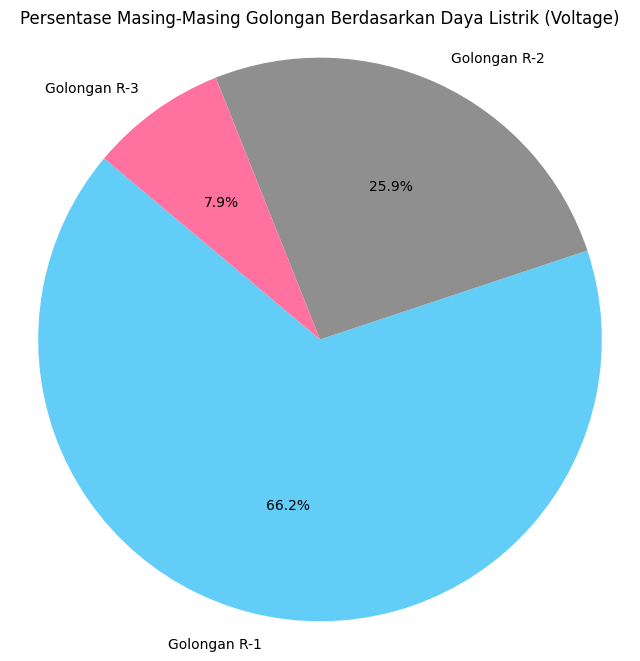

In [19]:
# Menghitung persentase masing-masing kategori
voltage_counts = df_eda['voltage_category'].value_counts()
voltage_percentages = (voltage_counts / voltage_counts.sum()) * 100

plt.figure(figsize=(8, 8))
plt.pie(voltage_percentages, labels=voltage_percentages.index, autopct='%1.1f%%', startangle=140, colors=['#62CEF8','#8F8F8F','#ff729f'])
plt.title('Persentase Masing-Masing Golongan Berdasarkan Daya Listrik (Voltage)')
plt.axis('equal')
plt.show()

Sebanyak 66.2% rumah berada di Golongan R-1 (450 VA - 2200 VA), menunjukkan bahwa mayoritas rumah menggunakan daya listrik rendah hingga sedang. Sekitar 25.9% rumah masuk dalam Golongan R-2 (3300 VA - 5500 VA), menunjukkan kebutuhan daya menengah. Hanya 7.9% rumah berada di Golongan R-3 (6600 VA ke atas), menunjukkan bahwa rumah dengan daya tinggi adalah minoritas dan umumnya properti besar atau mewah.

In [20]:
df_eda.head(1)

,area,city,lattitude,logitude,property_type,bedrooms,bathrooms,land_area,building_area,floors,...,maid_bathrooms,certificate,voltage,building_age,year,condition,garage,carport,price,voltage_category
0,Summarecon Bekasi,Bekasi,-6.223945,106.986275,rumah,4.0,4.0,239.0,272.0,2.0,...,1.0,shm - sertifikat hak milik,4400.0,5.0,2017.0,bagus,0,0,2990000000,Golongan R-2


In [21]:
# Definisikan kriteria rumah mewah (building_area >= 300 m2)
luxury_homes = df_eda[df_eda['building_area'] >= 300]
# Kelompokkan berdasarkan 'area' dan hitung jumlah rumah mewah di setiap area
top_areas_luxury = luxury_homes['area'].value_counts().nlargest(5)
# Hitung rata-rata harga untuk setiap area yang memiliki rumah mewah terbanyak
average_price_per_area = luxury_homes.groupby('area')['price'].mean()
# Filter rata-rata harga hanya untuk area top 5
top_areas_avg_price = average_price_per_area[top_areas_luxury.index]
# Menampilkan hasil dalam bentuk DataFrame
mewah = pd.DataFrame({
    'Number of Luxury Homes': top_areas_luxury,
    'Average Price': top_areas_avg_price
})
pd.options.display.float_format = '{:,.0f}'.format

mewah

,Number of Luxury Homes,Average Price
area,,
Sentul City,66,"10,216,666,667"
Pantai Indah Kapuk,33,"20,206,060,606"
Kemang,23,"21,404,347,826"
BSD,19,"14,200,000,000"
Alam Sutera,14,"10,789,285,714"


```
* H0: Tidak ada perbedaan signifikan bahwa rumah sebelum tahun 2000 lebih murah dibandingkan dengan rumah yang lebih baru.

* H1: Rumah sebelum tahun 2000 memiliki harga rata-rata lebih rendah daripada rumah yang lebih baru.
```

In [22]:
# Filter data based on the year of construction
sebelum_2000 = df_eda[df_eda['year'] < 2000]['price']
sesudah_2000 = df_eda[df_eda['year'] >= 2000]['price']
# Check the number of houses in each group to ensure sufficient data points
print(f"Number of houses before 2000: {len(sebelum_2000)}")
print(f"Number of houses after 2000: {len(sesudah_2000)}")
# Conduct t-test for independent samples
t_stat, p_value = stats.ttest_ind(sebelum_2000, sesudah_2000, alternative='less', nan_policy='omit')
# Display the t-test result
print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_value}")
# Conclusion based on the p-value
alpha = 0.05
if p_value < alpha:
    conclusion = "H0 Ditolak: Rumah sebelum tahun 2000 memiliki harga rata-rata lebih rendah daripada rumah yang lebih baru."
else:
    conclusion = "H0 Gagal Ditolak: Tidak ada perbedaan signifikan bahwa rumah sebelum tahun 2000 lebih murah dibandingkan dengan rumah yang lebih baru."
print(conclusion)

Number of houses before 2000: 38
Number of houses after 2000: 2813
T-Statistic: 3.231547802870149
P-Value: 0.9993773784655107
H0 Gagal Ditolak: Tidak ada perbedaan signifikan bahwa rumah sebelum tahun 2000 lebih murah dibandingkan dengan rumah yang lebih baru.


* Berdasarkan hasil uji t-test, dengan p-value sebesar 0.999, kita gagal menolak hipotesis nol (H0). Ini berarti tidak ada bukti signifikan bahwa rumah yang dibangun sebelum tahun 2000 lebih murah dibandingkan rumah yang dibangun setelah tahun 2000.

In [23]:
# Melihat deskripsi price
df_eda['price'].describe()

count             2,851
mean      3,880,243,774
std      13,513,785,958
min          42,000,000
25%         798,000,000
50%       1,450,000,000
75%       3,500,000,000
max     580,000,000,000
Name: price, dtype: float64

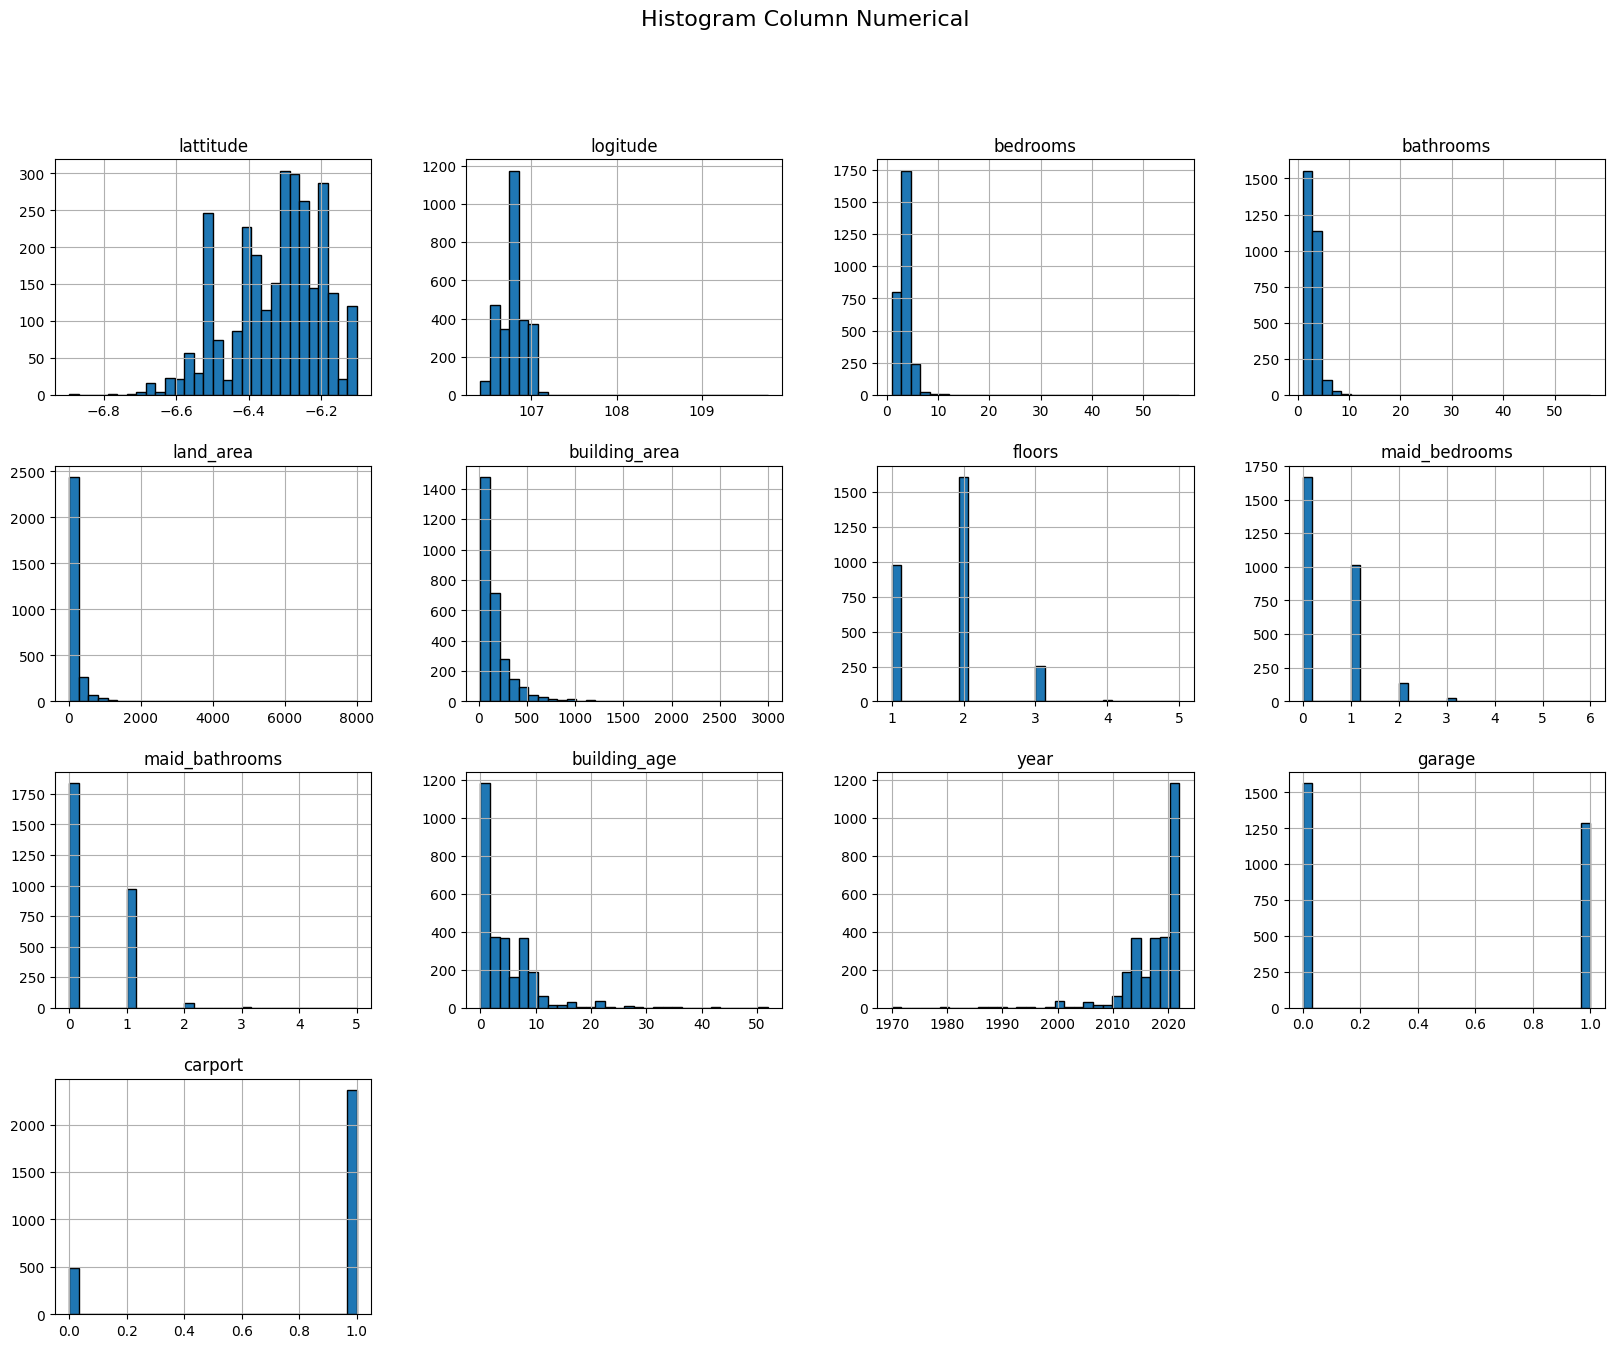

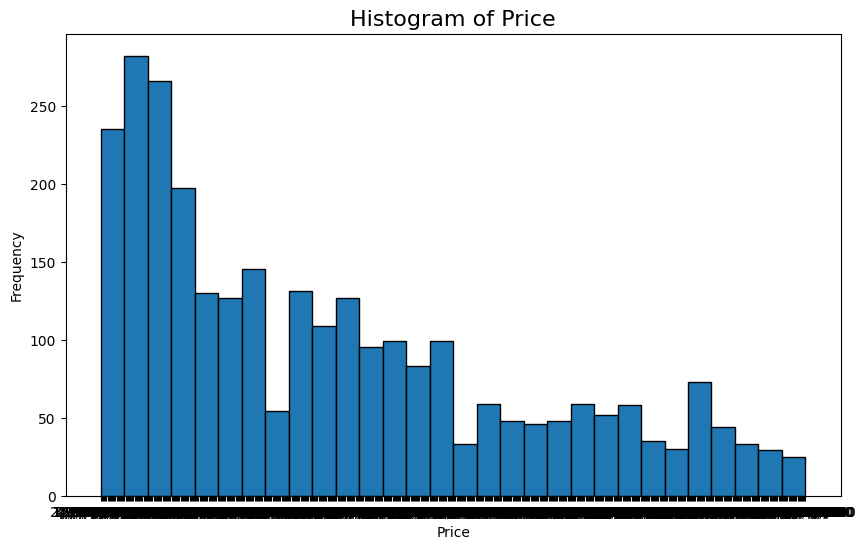

In [24]:
# Membuat histogram untuk seluruh kolom numerik, termasuk 'price'
df.hist(figsize=(20, 15), bins=30, edgecolor='black')
plt.suptitle('Histogram Column Numerical', fontsize=16)
plt.show()

# Membuat histogram khusus untuk kolom 'price' agar lebih jelas
plt.figure(figsize=(10, 6))
plt.hist(df['price'], bins=30, edgecolor='black')
plt.title('Histogram of Price', fontsize=16)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

* Bedrooms dan Bathrooms: Mayoritas rumah memiliki 2-4 kamar tidur dan 1-2 kamar mandi, dengan beberapa outlier yang memiliki jumlah kamar lebih tinggi, menunjukkan distribusi yang condong ke sisi kanan.

* Land Area dan Building Area: Sebagian besar rumah berukuran kecil, dengan distribusi yang menurun tajam di ukuran yang lebih besar. Terdapat beberapa rumah besar sebagai outlier.

* Floors: Sebagian besar rumah memiliki 1-2 lantai, menunjukkan distribusi yang terkonsentrasi pada rumah bertingkat rendah.

* Maid Bedrooms dan Bathrooms: Sebagian besar rumah tidak memiliki kamar pembantu, hanya sedikit yang memiliki 4-6 kamar, menunjukkan distribusi yang sangat miring ke sisi kiri.

* Building Age dan Year: Sebagian besar rumah relatif baru, dibangun dalam 10-20 tahun terakhir, dengan sedikit rumah tua yang menjadi outlier.

* Garage dan Carport: Mayoritas rumah memiliki carport, dengan garasi lebih jarang, menunjukkan preferensi terhadap carport.

* Harga Rumah (Price): Sebagian besar rumah memiliki harga rendah, sementara rumah berharga tinggi jarang dan menjadi outlier, menunjukkan distribusi harga yang condong ke kiri.

Secara keseluruhan, mayoritas rumah berukuran kecil hingga sedang dan terjangkau, dengan beberapa rumah besar atau berharga tinggi sebagai outlier. Distribusi data menunjukkan adanya kecenderungan pada rumah berukuran kecil dan harga rendah, dengan sedikit variasi di ukuran besar dan harga tinggi.

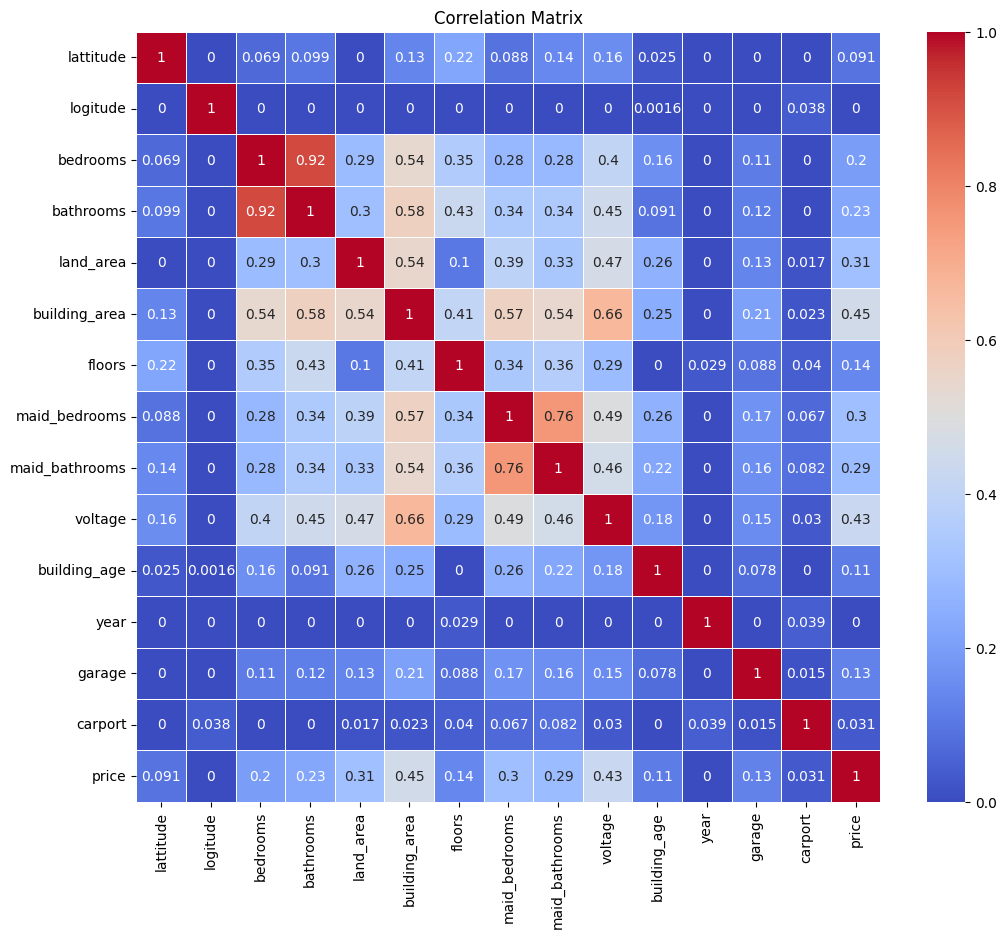

In [25]:
# Correlation Analysis Heatmap
# Menghitung matriks korelasi termasuk kolom 'price'
correlation_matrix = df_eda.corr(numeric_only=True)
# Membatasi nilai korelasi antara 0 hingga 1
correlation_matrix_limited = correlation_matrix.clip(lower=0, upper=1)
# Plot heatmap untuk matriks korelasi yang sudah dibatasi
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_limited, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

Dari heatmap kita dapat menyimpulkan bahwa:

* Korelasi positif yang cukup signifikan antara age dan charges. Ini berarti semakin tua seseorang, kemungkinan besar charge asuransinya akan lebih tinggi.

* BMI juga memiliki korelasi positif dengan charges, meskipun tidak sekuat age. Ini menunjukkan bahwa individu dengan BMI lebih tinggi cenderung membayar charge lebih besar.

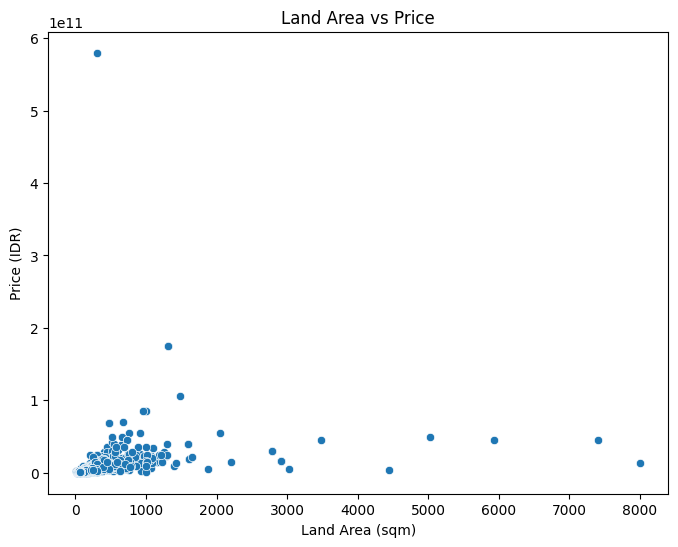

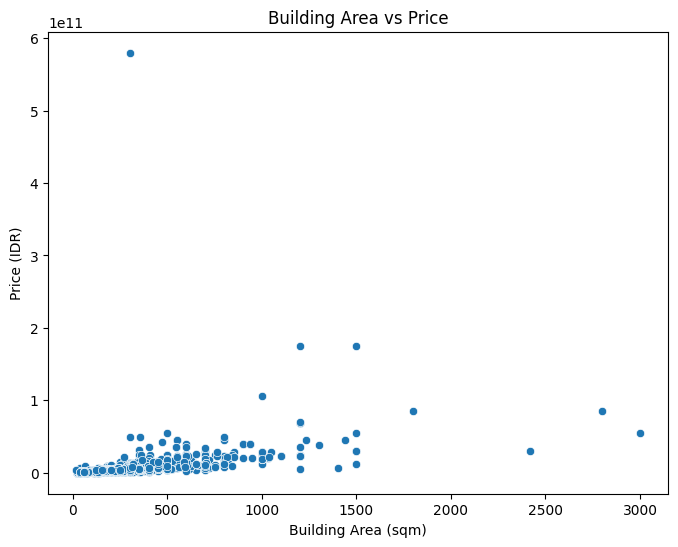

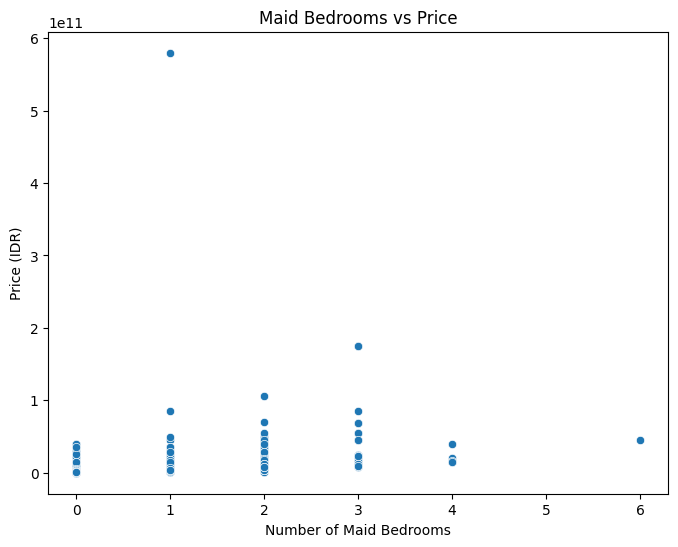

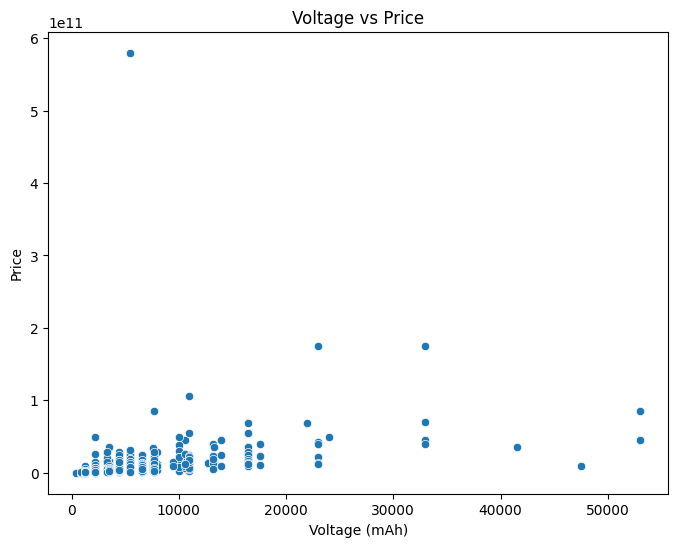

In [26]:
# Hubungan Antar 'land_area' vs 'price'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='land_area', y='price', data=df_eda)
plt.title('Land Area vs Price')
plt.xlabel('Land Area (sqm)')
plt.ylabel('Price (IDR)')
plt.show()
# Hubungan Antar 'building_area' vs 'price'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='building_area', y='price', data=df_eda)
plt.title('Building Area vs Price')
plt.xlabel('Building Area (sqm)')
plt.ylabel('Price (IDR)')
plt.show()

# Hubungan Antar 'maid_bedrooms' vs 'price'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='maid_bedrooms', y='price', data=df_eda)
plt.title('Maid Bedrooms vs Price')
plt.xlabel('Number of Maid Bedrooms')
plt.ylabel('Price (IDR)')
plt.show()

# Hubungan Antar 'voltage' vs 'price'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='voltage', y='price', data=df_eda)
plt.title('Voltage vs Price')
plt.xlabel('Voltage (mAh)')
plt.ylabel('Price')
plt.show()

* Dari visualisasi di atas, dapat disimpulkan bahwa luas tanah dan luas bangunan memiliki hubungan positif dengan harga properti—semakin besar luas tanah atau bangunan, cenderung semakin tinggi harga properti. Namun, terlihat adanya penyebaran yang cukup besar dan beberapa outlier, menunjukkan bahwa faktor lain juga mempengaruhi harga.

* Jumlah kamar pembantu memiliki sedikit pengaruh terhadap harga properti, meskipun harga cenderung meningkat dengan lebih banyak kamar pembantu, ada beberapa penyebaran dan outlier.
* Tegangan listrik (mAh) juga menunjukkan kecenderungan peningkatan harga, tetapi dengan banyak variasi dan beberapa titik yang tidak konsisten.

Secara umum, kedua faktor ini berpengaruh tetapi bukan satu-satunya penentu utama harga properti.

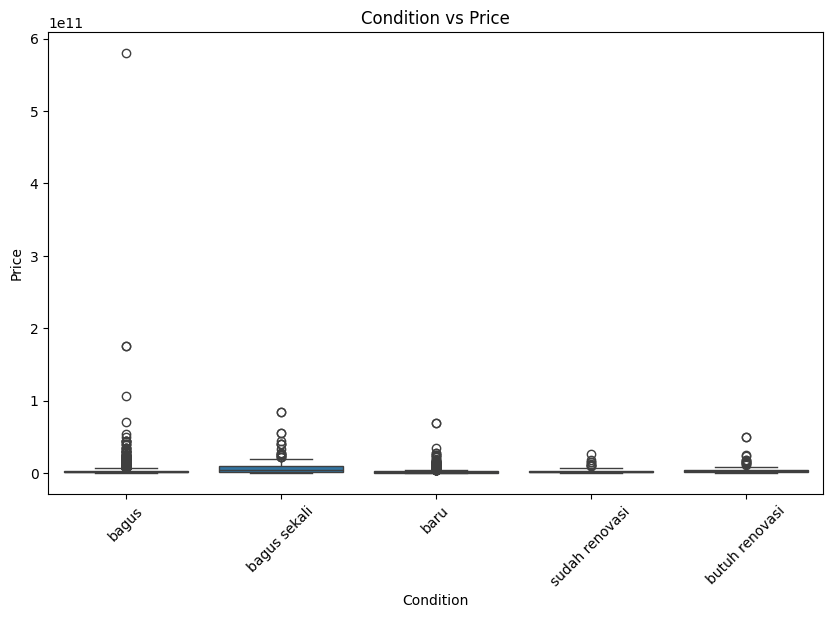

In [27]:
# Hubungan Antar 'condition' vs 'price'
plt.figure(figsize=(10, 6))
sns.boxplot(x='condition', y='price', data=df_eda)
plt.title('Condition vs Price')
plt.xlabel('Condition')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

* Properti dengan kondisi "bagus sekali" dan "bagus" cenderung memiliki harga lebih tinggi dibanding kondisi lain.
* Terdapat beberapa outlier di setiap kategori kondisi, menunjukkan adanya properti dengan harga sangat tinggi meskipun kondisinya biasa atau di bawah rata-rata.
* Kondisi "baru" memiliki distribusi serupa dengan yang lain, namun variasinya tidak terlalu besar.

Ini menunjukkan bahwa kondisi memang mempengaruhi harga, tetapi ada faktor lain yang juga berperan besar dalam menentukan variasi harga.

# **V. Feature Engineering**

In [28]:
# Merapihkan data sebelum di split, formating dan sebagainya.
# Merubah isi di column certificate
df['certificate'] = df['certificate'].replace({
    'shm - sertifikat hak milik': 'shm',
    'hgb - hak guna bangunan': 'hgb',
    'lainnya (ppjb,girik,adat,dll)': 'lainnya'
})
# Merubah isi di column voltage dan merubah menjadi float
df['voltage'] = df['voltage'].str.replace(' mah', '').astype(int)
# Merubah isi di column price dan merubah menjadi float
df['price'] = df['price'].str.replace(',','').astype(int)


Data sudah dibersihkan, selanjutnya sudah bisa di split

In [29]:
# Cek data kosong, jika ada langsung di buang disini saja
for i in df.columns:
    if df[i].isnull().sum()>0:
        print(i,"=",df[i].isnull().sum()*100/df.shape[0],"%")

bedrooms = 0.9119607155384076 %
bathrooms = 0.7365836548579446 %
floors = 0.035075412136092596 %
certificate = 3.332164152928797 %


In [30]:
df = df.dropna()

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2726 entries, 0 to 3033
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   area            2726 non-null   object 
 1   city            2726 non-null   object 
 2   lattitude       2726 non-null   float64
 3   logitude        2726 non-null   float64
 4   property_type   2726 non-null   object 
 5   bedrooms        2726 non-null   float64
 6   bathrooms       2726 non-null   float64
 7   land_area       2726 non-null   float64
 8   building_area   2726 non-null   float64
 9   floors          2726 non-null   float64
 10  maid_bedrooms   2726 non-null   float64
 11  maid_bathrooms  2726 non-null   float64
 12  certificate     2726 non-null   object 
 13  voltage         2726 non-null   int64  
 14  building_age    2726 non-null   float64
 15  year            2726 non-null   float64
 16  condition       2726 non-null   object 
 17  garage          2726 non-null   int64 

Seluruh data sudah bersih dari missing value, saya decide buang di sini karena setelah saya coba akan mengalami eror jika di buang nanti, dan juga missing value yang saya temui dibawah 5% di seluruh column, jadi saya decide untuk drop all saja. Seluruh data juga sudah sesuai data typenya.

#### Splitting Dataset X and y

In [32]:
# Splitting dataset into features (X) and target (y)
X = df.drop('price', axis=1)
y = df['price']

#### Cek Asumption

**Multicolinearity**

In [33]:
X_asumption = X.copy()

In [34]:
X_asumption.head(1)

,area,city,lattitude,logitude,property_type,bedrooms,bathrooms,land_area,building_area,floors,maid_bedrooms,maid_bathrooms,certificate,voltage,building_age,year,condition,garage,carport
0,Summarecon Bekasi,Bekasi,-6,107,rumah,4,4,239,272,2,0,1,shm,4400,5,"2,017",bagus,0,0


In [35]:
# List of columns to encode
encode_kolom = ['area', 'city', 'property_type', 'certificate', 'condition']
# Initialize the LabelEncoder
encoderlabel = LabelEncoder()
# Apply Label Encoding to each column in the list
# Note: LabelEncoder should be applied to each column separately, not to the entire DataFrame at once.
region_df = X_asumption[encode_kolom].apply(lambda col: encoderlabel.fit_transform(col.astype(str)))

* Membuat fungsi untuk encode column (variabel sudah di pisah dan tidak akan mempengaruhi data)

In [36]:
for col in encode_kolom:
    encoded_labels = encoderlabel.fit_transform(X[col])
    encoded_df = pd.DataFrame(encoded_labels, columns=[col], index=X.index)
    X_asumption = pd.concat([X_asumption.drop(col, axis=1), encoded_df], axis=1)

X_asumption

,lattitude,logitude,bedrooms,bathrooms,land_area,building_area,floors,maid_bedrooms,maid_bathrooms,voltage,building_age,year,garage,carport,area,city,property_type,certificate,condition
0,-6,107,4,4,239,272,2,0,1,4400,5,"2,017",0,0,325,0,0,2,0
1,-6,107,3,2,55,69,2,0,0,2200,6,"2,016",0,1,325,0,0,0,0
2,-6,107,3,3,119,131,2,1,1,2200,1,"2,021",1,1,325,0,0,0,0
3,-6,107,3,3,180,174,2,1,1,3500,6,"2,016",1,0,325,0,0,2,1
4,-6,107,4,3,328,196,2,1,1,3500,9,"2,013",1,1,325,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3029,-6,107,2,1,72,36,1,0,0,1300,0,"2,022",1,1,179,8,0,2,2
3030,-6,107,3,2,85,60,2,0,0,1300,0,"2,022",0,1,218,8,0,2,2
3031,-6,107,3,2,78,60,2,0,0,1300,0,"2,022",0,1,218,8,0,2,2
3032,-6,107,3,2,60,65,2,0,0,2200,0,"2,022",0,1,19,8,0,2,2


In [37]:
X_asumption.dropna(inplace=True)

In [38]:
# Multicollinearity test
def calc_vif(x):
    vif = pd.DataFrame()
    vif["variables"] = x.columns
    vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    return(vif)

In [39]:
calc_vif(X_asumption)

c:\Users\Alridho\miniconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


,variables,VIF
0,lattitude,1
1,logitude,2
2,bedrooms,7
3,bathrooms,8
4,land_area,2
5,building_area,3
6,floors,1
7,maid_bedrooms,3
8,maid_bathrooms,3
9,voltage,2


* VIF 1 - 5: Sebagian besar variabel, seperti lattitude, logitude, land_area, building_area, floors, dan lainnya, memiliki VIF antara 1 hingga 5, menunjukkan sedikit atau tidak ada masalah multikolinearitas.

* VIF 5 - 10: beberapa variabel dengan VIF lebih tinggi, yaitu bedrooms (7) dan bathrooms (7), yang menunjukkan adanya multikolinearitas moderat hingga cukup tinggi, sehingga perlu penanganan lebih lanjut. Untuk building_age: 11, menunjukkan ada indikasi masalah multikolinearitas yang perlu diatasi

* Year harus dipertimbangkan untuk dikeluarkan dari model karena memiliki multikolinearitas yang sangat parah (VIF sangat tinggi).
* building_age, bedrooms, dan bathrooms memiliki VIF yang cukup tinggi, jadi mungkin perlu dipertimbangkan untuk dihilangkan atau didekomposisi lebih lanjut untuk mengurangi korelasinya.
* Sebagian besar variabel lainnya memiliki VIF yang rendah, sehingga tidak ada indikasi masalah multikolinearitas yang signifikan.
* property_type akan dibuang karena sama di seluruh data

**Linear Relationship**

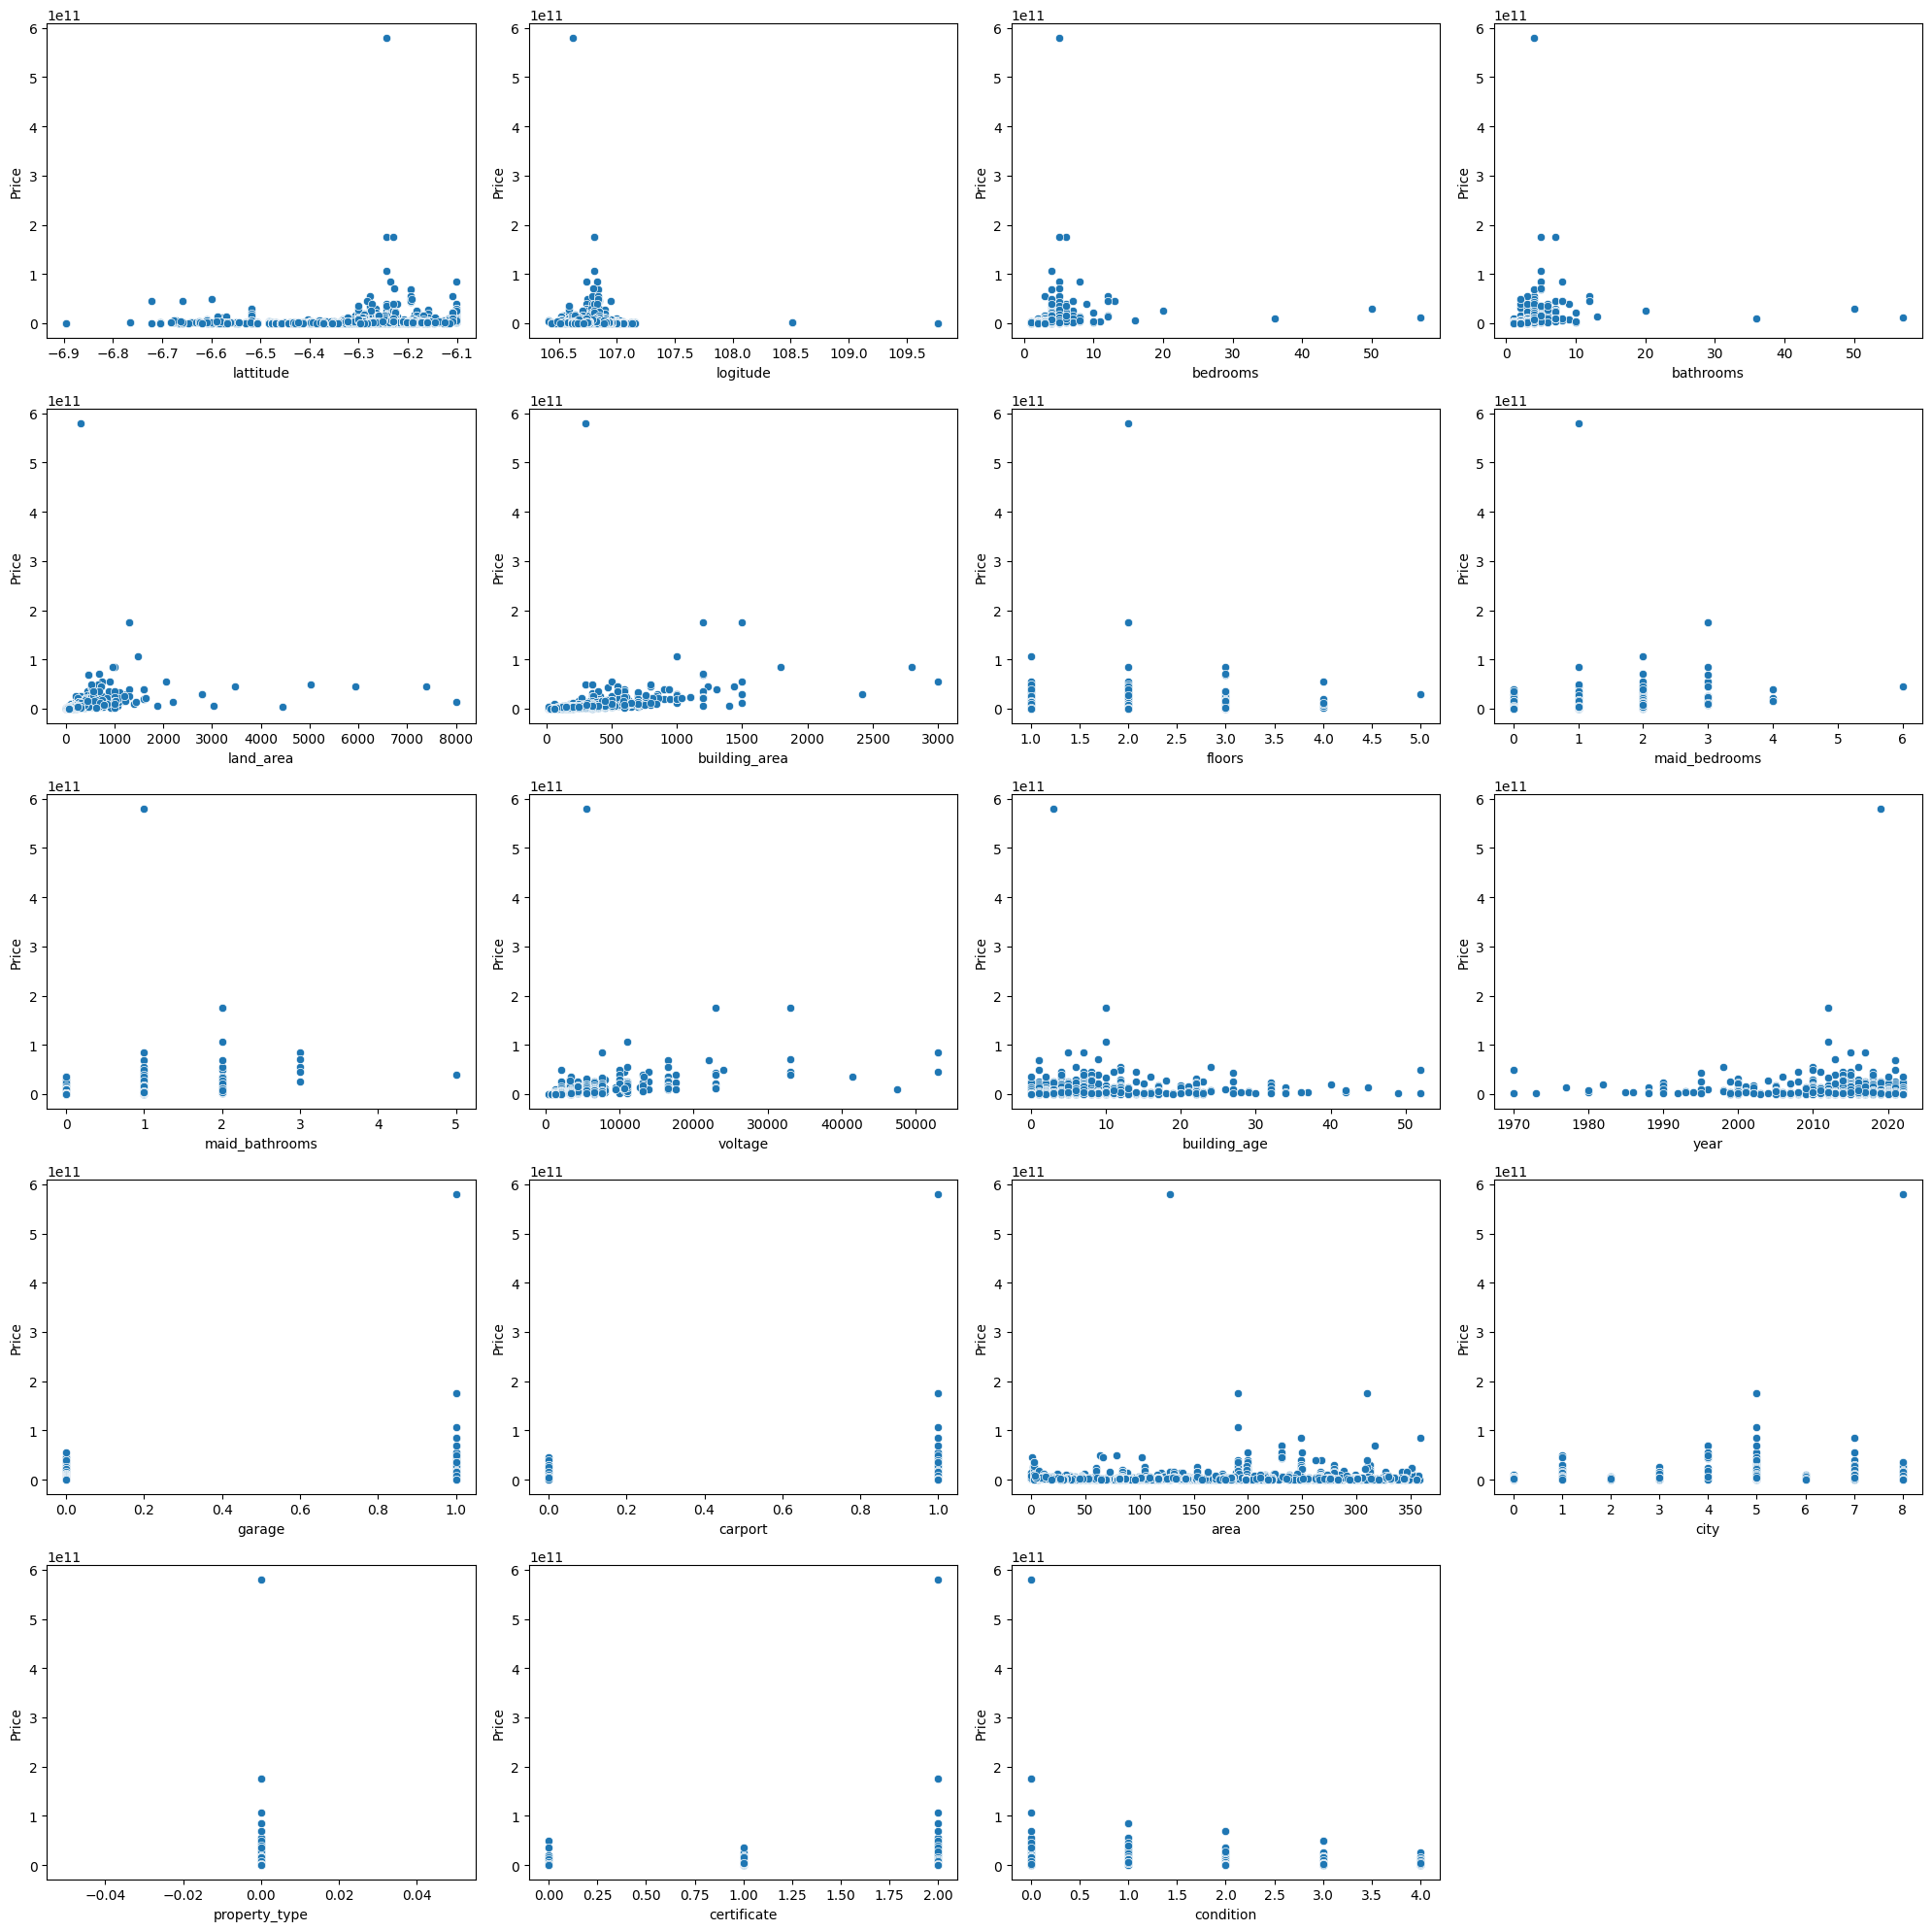

In [40]:
# Check the relationship between independent variables and dependent variable
fig = plt.figure(figsize=(20, 20))
cols = X_asumption.columns.tolist()  # Assuming X_asumption is being used as X_asumption
num_plots = len(cols)

for index in range(1, num_plots + 1):
    fig.add_subplot(5, 4, index)  # Adjusted the subplot grid for better fit
    sns.scatterplot(data=X_asumption, x=cols[index - 1], y=y)
    plt.xlabel(cols[index - 1])
    plt.ylabel('Price')

plt.tight_layout()
plt.show()

Secara keseluruhan, luas tanah dan luas bangunan menunjukkan kecenderungan positif terhadap harga properti, tetapi sebaran data yang besar mengindikasikan adanya faktor lain yang berpengaruh. Jumlah kamar tidur, kamar mandi, dan tegangan listrik juga memiliki korelasi positif yang lemah, namun terdapat banyak outlier. Fitur lain, seperti carport, garage, dan maid bedrooms, tidak menunjukkan hubungan signifikan dengan harga. Oleh karena itu, prediksi harga properti kemungkinan memerlukan pendekatan non-linear atau model yang lebih kompleks untuk menangani pengaruh variabel yang kecil atau tidak signifikan.

#### Splitting Dataset Train-Set and Test-set

In [41]:
# Splitting the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)
print('Train Size: ', X_train.shape)
print('Test Size: ', X_test.shape)

Train Size:  (2180, 19)
Test Size:  (546, 19)


#### Split Numerical Columns and Categorical Columns

In [42]:
# Splitting numerical and categorical columns
num_columns = X_train.select_dtypes(include=['float64','int64']).columns
cat_columns = X_train.select_dtypes(include=['object']).columns

num_columns = num_columns.drop(['garage', 'carport'])
cat_columns = cat_columns.insert(4, ['garage', 'carport'])

# Creating separate DataFrames for numerical and categorical columns
X_train_num = X_train[num_columns]
X_train_cat = X_train[cat_columns]

X_test_num = X_test[num_columns]
X_test_cat = X_test[cat_columns]


pd.options.display.float_format = '{:.2f}'.format
# Displaying the results
print(f"Numerical columns: {list(num_columns)}")
print(f"Categorical columns: {list(cat_columns)}")

Numerical columns: ['lattitude', 'logitude', 'bedrooms', 'bathrooms', 'land_area', 'building_area', 'floors', 'maid_bedrooms', 'maid_bathrooms', 'voltage', 'building_age', 'year']
Categorical columns: ['area', 'city', 'property_type', 'certificate', 'garage', 'carport', 'condition']


In [43]:
X_test_num.head(5)

,lattitude,logitude,bedrooms,bathrooms,land_area,building_area,floors,maid_bedrooms,maid_bathrooms,voltage,building_age,year
2983,-6.20,106.44,4.00,4.00,155.00,300.00,3.00,0.00,0.00,2200,2.00,2020.00
2518,-6.30,106.59,3.00,2.00,300.00,175.00,2.00,1.00,1.00,2200,21.00,2001.00
1910,-6.19,106.70,2.00,3.00,90.00,120.00,2.00,1.00,1.00,4400,4.00,2018.00
1517,-6.40,106.84,3.00,3.00,106.00,150.00,2.00,1.00,0.00,3300,8.00,2014.00
283,-6.21,107.01,4.00,2.00,98.00,165.00,2.00,0.00,0.00,3300,8.00,2014.00


In [44]:
X_test_cat.head(5)

,area,city,property_type,certificate,garage,carport,condition
2983,Balaraja,Tangerang,rumah,shm,0,1,sudah renovasi
2518,BSD City,Tangerang,rumah,shm,1,1,bagus sekali
1910,Green Lake City,Jakarta Barat,rumah,shm,0,1,bagus sekali
1517,Sukmajaya,Depok,rumah,shm,1,0,bagus
283,Bekasi Utara,Bekasi,rumah,hgb,0,1,baru


In [45]:
X_train_cat.head(5)

,area,city,property_type,certificate,garage,carport,condition
3000,Kreo,Tangerang,rumah,shm,0,1,baru
132,Bekasi Kota,Bekasi,rumah,hgb,0,1,baru
2615,BSD,Tangerang,rumah,lainnya,1,0,bagus
2729,Curug,Tangerang,rumah,shm,0,1,bagus sekali
1406,Cinangka,Depok,rumah,shm,0,1,baru


In [46]:
X_train_num.head(5)

,lattitude,logitude,bedrooms,bathrooms,land_area,building_area,floors,maid_bedrooms,maid_bathrooms,voltage,building_age,year
3000,-6.23,106.74,3.00,2.00,297.00,145.00,2.00,1.00,1.00,3500,0.00,2022.00
132,-6.28,106.97,2.00,2.00,60.00,40.00,1.00,0.00,0.00,1300,1.00,2021.00
2615,-6.30,106.59,3.00,3.00,128.00,144.00,2.00,0.00,0.00,2200,3.00,2019.00
2729,-6.24,106.57,2.00,1.00,72.00,45.00,1.00,0.00,0.00,1300,3.00,2019.00
1406,-6.37,106.76,2.00,1.00,70.00,48.00,1.00,0.00,0.00,1300,0.00,2022.00


* Data sudah di split X dan y, kemudian di split train dan test, kemudian di split num dan cat

#### Outliers Handling

Menggunakan IQR Method karena distibusi price yang cenderung highly skewed secara positif.

In [47]:
X_train_num.head(1)

,lattitude,logitude,bedrooms,bathrooms,land_area,building_area,floors,maid_bedrooms,maid_bathrooms,voltage,building_age,year
3000,-6.23,106.74,3.00,2.00,297.00,145.00,2.00,1.00,1.00,3500,0.00,2022.00


In [48]:
# Calculate IQR for numerical features in X_train
Q1 = X_train_num.quantile(0.25)
Q3 = X_train_num.quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper boundaries for each numerical column
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Handling outliers for each numerical column

# Flag outliers for 'lattitude'
outliers_lattitude = np.where(X_train['lattitude'] > upper_bound['lattitude'], True,
                        np.where(X_train['lattitude'] < lower_bound['lattitude'], True, False))

# Flag outliers for 'logitude'
outliers_logitude = np.where(X_train['logitude'] > upper_bound['logitude'], True,
                        np.where(X_train['logitude'] < lower_bound['logitude'], True, False))

# Flag outliers for 'bedrooms'
outliers_bedrooms = np.where(X_train['bedrooms'] > upper_bound['bedrooms'], True,
                             np.where(X_train['bedrooms'] < lower_bound['bedrooms'], True, False))

# Flag outliers for 'bathrooms'
outliers_bathrooms = np.where(X_train['bathrooms'] > upper_bound['bathrooms'], True,
                             np.where(X_train['bathrooms'] < lower_bound['bathrooms'], True, False))

# Flag outliers for 'land_area'
outliers_land_area = np.where(X_train['land_area'] > upper_bound['land_area'], True,
                             np.where(X_train['land_area'] < lower_bound['land_area'], True, False))

# Flag outliers for 'building_area'
outliers_building_area = np.where(X_train['building_area'] > upper_bound['building_area'], True,
                             np.where(X_train['building_area'] < lower_bound['building_area'], True, False))

# Flag outliers for 'floors'
outliers_floors = np.where(X_train['floors'] > upper_bound['floors'], True,
                             np.where(X_train['floors'] < lower_bound['floors'], True, False))

# Flag outliers for 'maid_bedrooms'
outliers_maid_bedrooms = np.where(X_train['maid_bedrooms'] > upper_bound['maid_bedrooms'], True,
                             np.where(X_train['maid_bedrooms'] < lower_bound['maid_bedrooms'], True, False))

# Flag outliers for 'maid_bathrooms'
outliers_maid_bathrooms = np.where(X_train['maid_bathrooms'] > upper_bound['maid_bathrooms'], True,
                             np.where(X_train['maid_bathrooms'] < lower_bound['maid_bathrooms'], True, False))

# Flag outliers for 'voltage'
outliers_voltage = np.where(X_train['voltage'] > upper_bound['voltage'], True,
                             np.where(X_train['voltage'] < lower_bound['voltage'], True, False))

# Flag outliers for 'building_age'
outliers_building_age = np.where(X_train['building_age'] > upper_bound['building_age'], True,
                             np.where(X_train['building_age'] < lower_bound['building_age'], True, False))

# Flag outliers for 'year'
outliers_year = np.where(X_train['year'] > upper_bound['year'], True,
                             np.where(X_train['year'] < lower_bound['year'], True, False))


# Trimming the dataset to remove all rows with any outliers in numerical columns
outliers_combined = outliers_lattitude|outliers_logitude|outliers_bedrooms|outliers_bathrooms|outliers_land_area|outliers_building_area|outliers_floors|outliers_maid_bedrooms|outliers_maid_bathrooms|outliers_voltage|outliers_building_age|outliers_year
X_train_numtrimmed = X_train_num.loc[~outliers_combined]
X_train_cattrimmed = X_train_cat.loc[~outliers_combined]
y_train_trimmed = y_train.loc[~outliers_combined]

* Seluruh data X_train dan y_train sudah di trim, sekarang data sudah bersih dari outlier

#### Missing Value Handling

In [49]:
# Check keberadaan missing values pada X_train_num
print("Missing values in X_train_num:")
print(X_train_numtrimmed.isnull().sum())
# Check keberadaan missing values pada X_train_cat
print("\nMissing values in X_train_cat:")
print(X_train_cattrimmed.isnull().sum())

Missing values in X_train_num:
lattitude         0
logitude          0
bedrooms          0
bathrooms         0
land_area         0
building_area     0
floors            0
maid_bedrooms     0
maid_bathrooms    0
voltage           0
building_age      0
year              0
dtype: int64

Missing values in X_train_cat:
area             0
city             0
property_type    0
certificate      0
garage           0
carport          0
condition        0
dtype: int64


* Tidak ditemukan adanya missing value karena sudah di buang saat awal

#### Feature Selection

In [50]:
df.head(1)

,area,city,lattitude,logitude,property_type,bedrooms,bathrooms,land_area,building_area,floors,maid_bedrooms,maid_bathrooms,certificate,voltage,building_age,year,condition,garage,carport,price
0,Summarecon Bekasi,Bekasi,-6.22,106.99,rumah,4.00,4.00,239.00,272.00,2.00,0.00,1.00,shm,4400,5.00,2017.00,bagus,0,0,2990000000


c:\Users\Alridho\miniconda3\Lib\site-packages\phik\data_quality.py:82: UserWarning: Not enough unique value for variable property_type for analysis 1. Dropping this column
  warnings.warn(


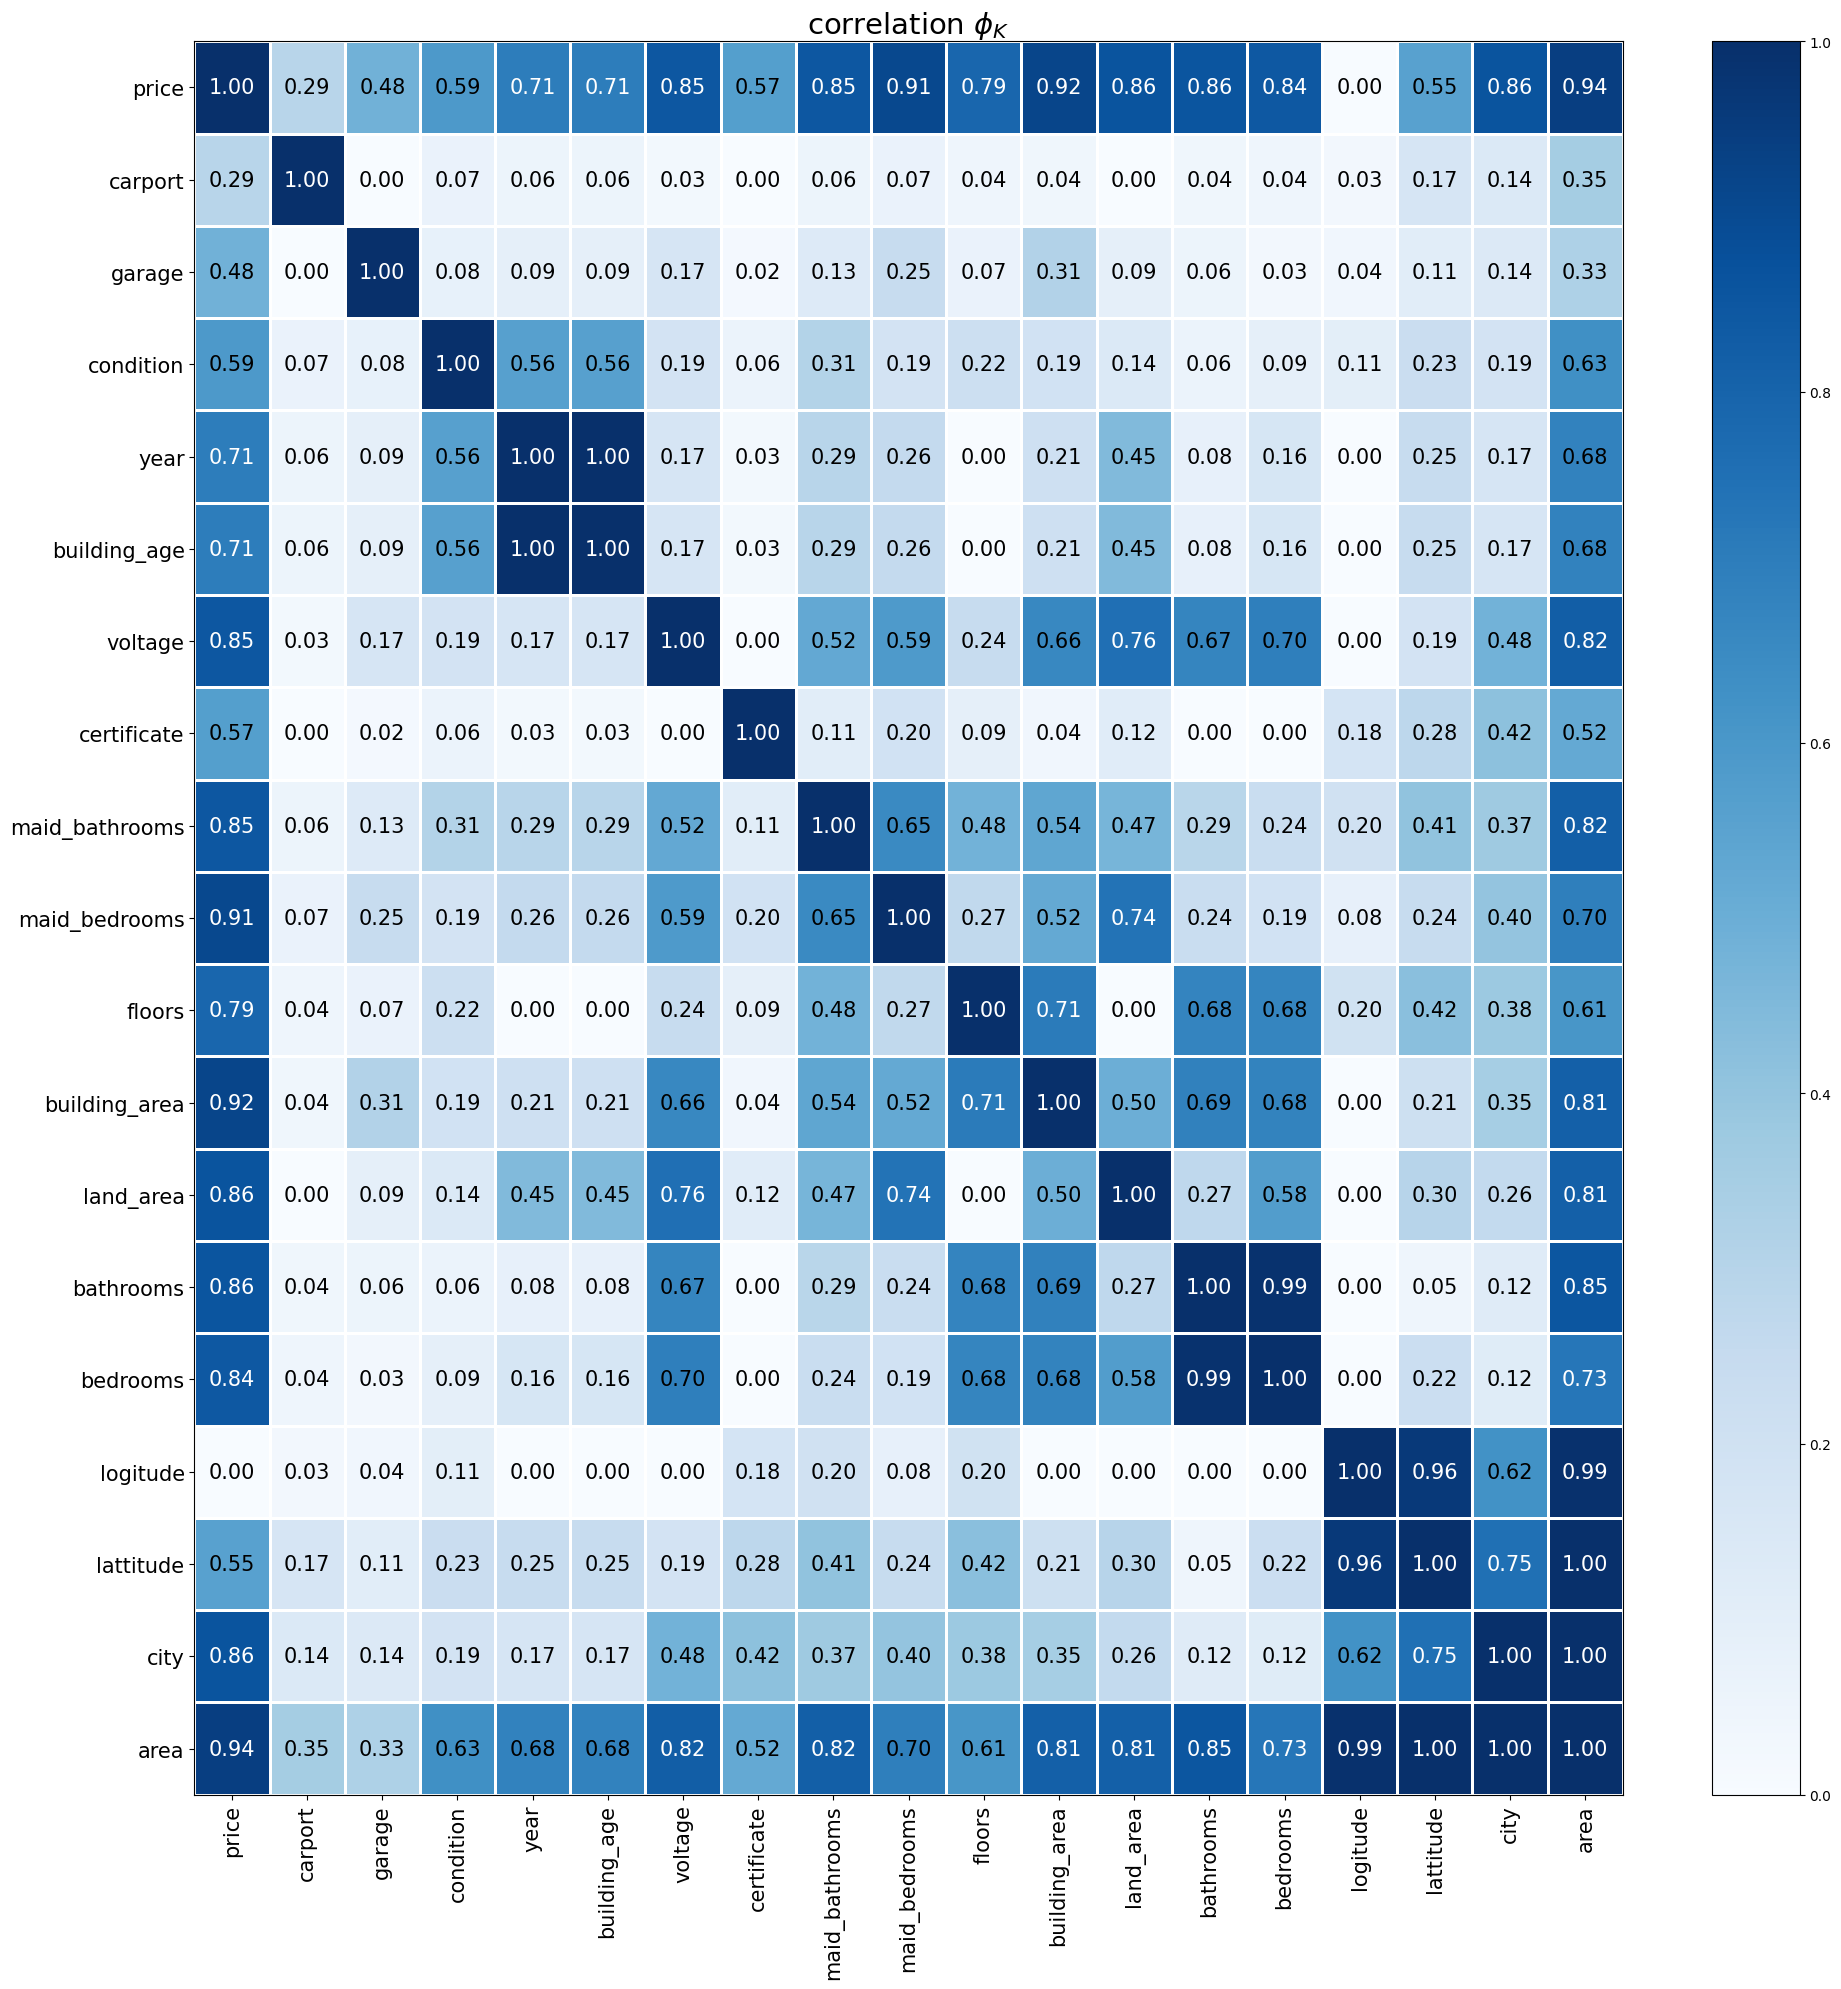

In [51]:
data_types = {
    'area': 'categorical',
    'city': 'categorical',
    'lattitude': 'interval',
    'logitude': 'interval',
    'property_type': 'categorical',
    'bedrooms': 'interval',
    'bathrooms': 'interval',
    'land_area': 'interval',
    'building_area': 'interval',
    'floors': 'interval',
    'maid_bedrooms': 'interval',
    'maid_bathrooms': 'interval',
    'certificate': 'categorical',
    'voltage': 'interval',
    'building_age': 'interval',
    'year': 'interval',
    'condition': 'categorical',
    'garage': 'interval',
    'carport': 'interval'
}
interval_cols = [col for col, v in data_types.items() if v=='interval' and col in df.columns]
phik_overview = df.phik_matrix(interval_cols=interval_cols)

plot_correlation_matrix(phik_overview.values, x_labels=phik_overview.columns, y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map='Blues', title=r'correlation $\phi_K$', fontsize_factor=1.5,
                        figsize=(20,20))
plt.tight_layout()

* year (VIF: 731,034): Nilai VIF yang sangat tinggi menunjukkan adanya multikolinearitas yang tinggi. Ini berarti year sangat berkorelasi dengan variabel lain, yang berpotensi menyebabkan ketidakstabilan dalam model dan sulitnya menginterpretasikan koefisien. fitur ini akan saya hapus.

* bedrooms dan bathrooms: Kedua fitur ini memiliki VIF sebesar 7 dan korelasi yang sangat tinggi satu sama lain dalam visualisasi phi_k, serta korelasi tinggi terhadap price (0.85 dan 0.86). Saya akan pilih salah satu fitur ini untuk menghindari multikolinearitas, saya akan mempertahankan bedrooms.

* latitude dan logitude: Kedua fitur ini memiliki korelasi sangat tinggi (phi_k = 0.99). Karena keduanya memberi informasi yang mirip, Salah satu akan saya buang, saya akan mempertahankan latitude.

* property_type: Akan saya buang karena semuanya sama yaitu 'rumah'

```
Fitur yang akan Dibuang
* Menghindari Multikolinearitas:

Fitur seperti year, bathrooms, longitude, dan latitude dibuang karena menunjukkan korelasi tinggi antar fitur atau memiliki VIF tinggi. Ini membantu mengurangi masalah multikolinearitas yang mengganggu stabilitas model.

* Mengurangi Redundansi:

bathrooms dibuang karena korelasinya tinggi dengan bedrooms, sehingga mengurangi informasi berlebihan yang bisa menyebabkan overfitting.

* Mengatasi Cardinality Tinggi:

property_type memiliki kategori yang hanya satu.

Dropping original columns 'area' karena sama saja dengan area, masih di dalam jabodetabek semuanya

* Simplifikasi Model:

Fitur seperti carport, garage, certificate, dan condition dibuang karena kontribusinya rendah terhadap prediksi atau mengandung banyak noise. Ini bertujuan untuk menjaga model tetap sederhana dan mudah diinterpretasi.
```

Menurut https://www.andrews.edu:
- Kolerasi `0.7` - `0.9` merupakan **highly colerated**
- Kolerasi `0.5` - `0.7` merupakan **moderately colerated**
- Kolerasi `0.3` - `0.5` merupakan **low colerated**

In [52]:
#Drop column
X_train_numtrimmed.drop('year', axis = 1, inplace = True)
X_train_numtrimmed.drop('bathrooms', axis = 1, inplace = True)
X_train_numtrimmed.drop('logitude', axis = 1, inplace = True)
X_train_numtrimmed.drop('lattitude', axis = 1, inplace = True)
X_train_cattrimmed.drop('property_type', axis = 1, inplace = True)
X_train_cattrimmed.drop('carport', axis = 1, inplace = True)
X_train_cattrimmed.drop('garage', axis=1, inplace=True)
X_train_cattrimmed.drop('condition', axis = 1, inplace = True)
X_train_cattrimmed.drop('certificate', axis=1, inplace=True)

X_test_cat.drop('property_type', axis = 1, inplace = True)
X_test_cat.drop('carport', axis = 1, inplace = True)
X_test_cat.drop('garage', axis=1, inplace=True)
X_test_cat.drop('condition', axis = 1, inplace = True)
X_test_cat.drop('certificate', axis=1, inplace=True)
X_test_num.drop('year', axis = 1, inplace = True)
X_test_num.drop('bathrooms', axis = 1, inplace = True)
X_test_num.drop('logitude', axis = 1, inplace = True)
X_test_num.drop('lattitude', axis = 1, inplace = True)

C:\Users\Alridho\AppData\Local\Temp\ipykernel_31448\858184689.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_numtrimmed.drop('year', axis = 1, inplace = True)
C:\Users\Alridho\AppData\Local\Temp\ipykernel_31448\858184689.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_numtrimmed.drop('bathrooms', axis = 1, inplace = True)
C:\Users\Alridho\AppData\Local\Temp\ipykernel_31448\858184689.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

**ALASAN DROP**
* year: Mengalami multikolinearitas tinggi (VIF sangat besar), menyebabkan masalah pada kestabilan model.
* bathrooms: Memiliki korelasi tinggi dengan bedrooms; salah satu harus dibuang untuk mengurangi multikolinearitas.
* longitude & latitude: Kedua kolom ini sangat berkorelasi satu sama lain, sehingga salah satu cukup untuk mewakili informasi lokasi.
* property_type: Memiliki VIF NaN, yang kemungkinan menunjukkan kurangnya variasi dalam data atau masalah dalam perhitungan.
* carport & garage: Memberikan informasi yang serupa, sehingga salah satu harus dibuang untuk menyederhanakan model.
* condition: Berdasarkan analisis, korelasi terhadap target tidak signifikan; pengaruhnya terhadap prediksi sangat kecil.
* certificate: Sertifikat properti memberikan informasi yang kurang relevan untuk model ini, dan tidak berpengaruh signifikan terhadap harga.

#### Handling Cardinality

In [53]:
print('Cardinal area: ', len(X_train_cattrimmed['area'].unique()))
print('Cardinal city: ', len(X_train_cattrimmed['city'].unique()))

Cardinal area:  288
Cardinal city:  9


In [54]:
unique_values_for_column(X_train_cattrimmed, 'area')

Column: area
Unique Values: ['Kreo' 'Bekasi Kota' 'BSD' 'Curug' 'Cinangka' 'Setu' 'Sentul City'
 'Dramaga' 'Alam Sutera' 'Cinere' 'Kedungwaringin'
 'Gading Serpong The Spring' 'Citayam' 'Beji' 'Cikeas' 'Sawangan'
 'Cilodong' 'Bekasi' 'Summarecon Bekasi' 'Kemayoran' 'Jati Cempaka'
 'Sukmajaya' 'Karawaci' 'Limo' 'Jatinegara' 'Cibinong' 'Tigaraksa'
 'Gunung Sindur' 'Jati Luhur' 'Cipete' 'Tangerang Kota' 'Gading Serpong'
 'Bojong Sari' 'Rawakalong' 'Jagakarsa' 'Pantai Indah Kapuk' 'Pondok Ungu'
 'Tanah Sareal' 'Cibubur' 'Pancoran Mas' 'Cileungsi' 'Pulo Gadung'
 'Harjamukti' 'Jatirangga' 'Harapan Indah' 'BSD Nusaloka' 'Bekasi Utara'
 'Cakung' 'Lebak Bulus' 'Kota Wisata' 'Tanah Baru' 'Duren Jaya'
 'Bukit Sentul' 'Karang Tengah' 'Sindang Jaya' 'Bojong Gede' 'Bintara'
 'BSD Delatinos' 'Rangga Mekar' 'Duta Harapan' 'Mustikasari'
 'Lengkong Kulon' 'Jatiwaringin' 'Jaka Setia' 'Kelapa Dua' 'BSD City'
 'Cilebut' 'Cipayung' 'Cikupa Citra Raya' 'Parung Panjang' 'Meruya'
 'Cimahpar' 'Tarumajaya' 'Kebo

In [55]:
unique_values_for_column(X_train_cattrimmed, 'city')

Column: city
Unique Values: [' Tangerang' ' Bekasi' ' Depok' ' Bogor' ' Jakarta Pusat'
 ' Jakarta Timur' ' Jakarta Selatan' ' Jakarta Utara' ' Jakarta Barat']



* Dapat di lihat seluruh area masih masuk di lingkup jabodetabek, maka dari itu city saja sudah bisa merepresentasikan daerah rumah. Selanjutnya Area akan saya drop

In [56]:
X_train_cattrimmed

,area,city
3000,Kreo,Tangerang
132,Bekasi Kota,Bekasi
2615,BSD,Tangerang
2729,Curug,Tangerang
1406,Cinangka,Depok
...,...,...
1770,Jagakarsa,Jakarta Selatan
2839,Cipondoh,Tangerang
584,Sentul City,Bogor
1360,Citayam,Depok


In [57]:
X_train_cattrimmed.drop('area', axis=1, inplace=True)
X_test_cat.drop('area', axis=1, inplace=True)

C:\Users\Alridho\AppData\Local\Temp\ipykernel_31448\2488999101.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_cattrimmed.drop('area', axis=1, inplace=True)
C:\Users\Alridho\AppData\Local\Temp\ipykernel_31448\2488999101.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_cat.drop('area', axis=1, inplace=True)


**Alasan Remove**
* area: bisa diwakili oleh city karena daerah seluruhnya masih jabodetabek.

#### Feature Scaling

In [58]:
scaler = MinMaxScaler()
scaler.fit(X_train_numtrimmed)

X_train_numtrimmed_scaled = scaler.transform(X_train_numtrimmed)
X_test_numtrimmed_scaled = scaler.transform(X_test_num)

X_test_numtrimmed_scaled

array([[0.5       , 0.43597561, 0.7382199 , ..., 0.        , 0.28455285,
        0.11764706],
       [0.33333333, 0.87804878, 0.41099476, ..., 0.5       , 0.28455285,
        1.23529412],
       [0.16666667, 0.23780488, 0.26701571, ..., 0.5       , 0.64227642,
        0.23529412],
       ...,
       [0.16666667, 0.94817073, 0.60732984, ..., 0.5       , 0.64227642,
        0.88235294],
       [0.16666667, 0.49695122, 0.43717277, ..., 0.5       , 0.82113821,
        0.41176471],
       [0.16666667, 0.2804878 , 0.10994764, ..., 0.        , 0.28455285,
        0.41176471]])

* Seluruh data num telah di transform menggunakan MinMaxScaler, ini digunakan karena menggunakan metode IQR

#### Feature Encoding

In [59]:
X_train_cattrimmed

,city
3000,Tangerang
132,Bekasi
2615,Tangerang
2729,Tangerang
1406,Depok
...,...
1770,Jakarta Selatan
2839,Tangerang
584,Bogor
1360,Depok


In [60]:
encoder = OrdinalEncoder(categories = [[' Bogor', ' Bekasi', ' Depok', ' Tangerang', ' Jakarta Barat', ' Jakarta Timur', ' Jakarta Utara', ' Jakarta Selatan', ' Jakarta Pusat']])
encoder.fit(X_train_cattrimmed)

OrdinalEncoder(categories=[[' Bogor', ' Bekasi', ' Depok', ' Tangerang',
                            ' Jakarta Barat', ' Jakarta Timur',
                            ' Jakarta Utara', ' Jakarta Selatan',
                            ' Jakarta Pusat']])

In [61]:
X_train_cat_encoded = encoder.fit_transform(X_train_cattrimmed)
X_test_cat_encoded = encoder.transform(X_test_cat)

X_train_cat_encoded

array([[3.],
       [1.],
       [3.],
       ...,
       [0.],
       [2.],
       [1.]])

* Saya menggunakan metode OrdinalEncoder karena menurut `ekonomi.bisnis.com` harga rumah di jabodetabek dari murah ke mahal adalah [' Bogor', ' Bekasi', ' Depok', ' Tangerang', ' Jakarta Barat', ' Jakarta Timur', ' Jakarta Utara', ' Jakarta Selatan', ' Jakarta Pusat']

#### Concate between Numeric Columns and Categorical Columns

In [62]:
#Concate Columns
X_train_final = np.concatenate([X_train_numtrimmed_scaled, X_train_cat_encoded], axis = 1)
X_test_final = np.concatenate([X_test_numtrimmed_scaled, X_test_cat_encoded], axis = 1)

In [63]:
X_train_final_df = pd.DataFrame(X_train_final, columns = ['bedrooms','land_area','building_area','floors','maid_bedrooms','maid_bathrooms','voltage','building_age','city'])
pd.options.display.float_format = '{:.3f}'.format
X_train_final_df

,bedrooms,land_area,building_area,floors,maid_bedrooms,maid_bathrooms,voltage,building_age,city
0,0.333,0.869,0.332,0.500,0.500,0.500,0.496,0.000,3.000
1,0.167,0.146,0.058,0.000,0.000,0.000,0.138,0.059,1.000
2,0.333,0.354,0.330,0.500,0.000,0.000,0.285,0.176,3.000
3,0.167,0.183,0.071,0.000,0.000,0.000,0.138,0.176,3.000
4,0.167,0.177,0.079,0.000,0.000,0.000,0.138,0.000,2.000
...,...,...,...,...,...,...,...,...,...
1783,0.500,0.271,0.634,1.000,1.000,0.500,0.496,0.000,7.000
1784,0.167,0.155,0.215,0.500,0.000,0.000,0.642,0.118,3.000
1785,0.167,0.421,0.118,0.000,0.000,0.500,0.138,0.118,0.000
1786,0.167,0.152,0.047,0.000,0.000,0.000,0.138,0.000,2.000


In [64]:
X_test_final_df = pd.DataFrame(X_test_final, columns = ['bedrooms','land_area','building_area','floors','maid_bedrooms','maid_bathrooms','voltage','building_age','city'])
# Setting pandas display option to show floating point numbers with more decimal places
pd.options.display.float_format = '{:.3f}'.format
X_test_final_df

,bedrooms,land_area,building_area,floors,maid_bedrooms,maid_bathrooms,voltage,building_age,city
0,0.500,0.436,0.738,1.000,0.000,0.000,0.285,0.118,3.000
1,0.333,0.878,0.411,0.500,0.500,0.500,0.285,1.235,3.000
2,0.167,0.238,0.267,0.500,0.500,0.500,0.642,0.235,4.000
3,0.333,0.287,0.346,0.500,0.500,0.000,0.463,0.471,2.000
4,0.500,0.262,0.385,0.500,0.000,0.000,0.463,0.471,1.000
...,...,...,...,...,...,...,...,...,...
541,0.333,3.488,1.262,0.500,0.500,0.500,0.642,0.412,0.000
542,0.333,0.162,0.157,0.500,0.500,0.500,0.496,0.000,2.000
543,0.167,0.948,0.607,0.500,0.500,0.500,0.642,0.882,0.000
544,0.167,0.497,0.437,0.500,0.500,0.500,0.821,0.412,7.000


* Data disatukan menjadi X_train_final_df dan X_test_final_df

# **VI. Model Definition**

Saya memilih Linear Regression karena model ini mudah dipahami dan diinterpretasikan, terutama jika fitur-fitur memiliki hubungan linier. Model ini juga sangat cocok dijadikan baseline untuk menetapkan titik awal sebelum melangkah ke model yang lebih canggih. Linear Regression dikenal efisien secara komputasi dan sederhana untuk diterapkan, menjadikannya ideal untuk eksperimen awal dan pelatihan cepat.

Selain itu, model ini memungkinkan saya untuk menganalisis hubungan antara fitur secara kuantitatif, memberikan insight bisnis yang mudah dipahami. Jika hasil evaluasi menunjukkan bahwa performanya kurang optimal, saya akan mempertimbangkan menggunakan model yang lebih kompleks untuk menangkap pola non-linier yang mungkin ada di dalam data.

# **VII. Model Training**

In [65]:
#Training using Linear Regression
model_lin_reg = LinearRegression()
model_lin_reg.fit(X_train_final, y_train_trimmed)

LinearRegression()

# **VIII. Model Evaluation**

In [66]:
# Find the coefficents and the intercept using Scikit-Learn (Linear Regression)
# Mendapatkan koefisien dan intercept
coefficients = model_lin_reg.coef_
intercept = model_lin_reg.intercept_

# Menampilkan koefisien dan intercept
print("Koefisien:", coefficients)
print("Intercept:", intercept)

Koefisien: [ 1.37315764e+08  2.44785441e+09  2.67292391e+09  2.59120784e+08
  2.27291965e+07  9.76490623e+08  1.56137680e+09 -4.67407968e+08
  1.60121954e+08]
Intercept: -659830121.7807992


Dari hasil Linear Regression, koefisien menunjukkan seberapa besar pengaruh masing-masing fitur terhadap harga properti. Koefisien positif berarti peningkatan fitur tersebut akan menaikkan harga, sedangkan koefisien negatif berarti peningkatan fitur tersebut justru menurunkan harga. Nilai koefisien yang besar menunjukkan fitur yang memiliki pengaruh signifikan terhadap prediksi harga, tetapi hal ini juga bisa mengindikasikan multikolinearitas antara fitur-fitur tertentu. Intercept negatif mengindikasikan bahwa prediksi harga saat semua fitur bernilai nol tidak realistis, yang bisa menunjukkan adanya bias atau masalah pada model. Model ini mungkin masih perlu perbaikan, terutama jika ditemukan ketergantungan berlebihan pada fitur tertentu, misalnya dengan menggunakan regularisasi seperti Ridge atau Lasso untuk menstabilkan koefisien.

In [67]:
y_pred_train = model_lin_reg.predict(X_train_final)
y_pred_tr = np.maximum(y_pred_train, 0)
y_pred_test = model_lin_reg.predict(X_test_final)
y_pred_te = np.maximum(y_pred_test, 0)
y_pred_tr

array([4.28540821e+09, 2.23643875e+08, 2.10502817e+09, ...,
       1.35687522e+09, 3.98197625e+08, 1.59653046e+09])

* y_pred_tr adalah hasil prediksi harga properti pada data training, memastikan bahwa tidak ada nilai negatif (karena harga properti tidak mungkin negatif).
* Prediksi ini membantu untuk mengevaluasi kinerja model, baik untuk mengukur overfitting (jika performa pada training jauh lebih baik dibanding test) maupun untuk melihat generalisasi pada data yang tidak dikenal.
* Jika hasil prediksi pada training sangat bagus tetapi pada test jauh lebih buruk, itu mengindikasikan overfitting, di mana model terlalu bergantung pada data training dan gagal menangkap pola yang lebih umum.

### Multivariate Normality

In [68]:
y_test_residuals = y_test - y_pred_te
y_test_residuals

2983   -1278029872.617
2518    1379720825.586
1910    -121395504.831
1517    -175866275.985
283    -1297519663.786
             ...      
714     2764233728.368
1571   -1125065781.756
761    -1026973219.927
1873    1662282334.810
836      355076663.871
Name: price, Length: 546, dtype: float64

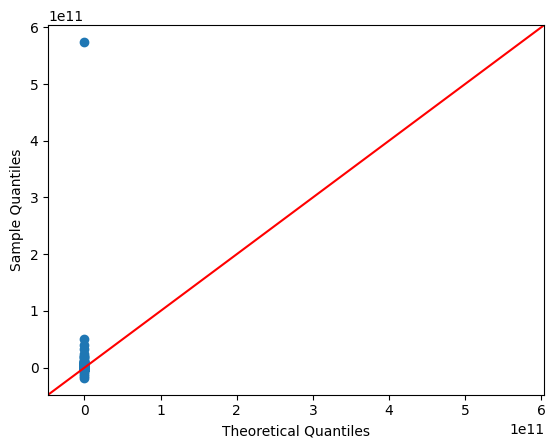

In [69]:
sm.qqplot(y_test_residuals, line ='45')
plt.show()

Q-Q Plot menunjukkan bahwa residual dari model Linear Regression tidak terdistribusi normal dan ada outliers signifikan yang mengganggu. Ini menunjukkan bahwa model Linear Regression mungkin tidak cukup baik dalam memodelkan hubungan antar fitur dengan target, terutama pada harga-harga yang ekstrim. Saya sarankan untuk mencoba model yang lebih kompleks, atau tangani outliers secara lebih efektif untuk mendapatkan hasil prediksi yang lebih baik.

### No Auto-Correlation

In [70]:
durbin_watson(y_test_residuals)

np.float64(2.005425635604733)

Durbin-Watson Test menghasilkan nilai antara 0 hingga 4.
* Nilai sekitar 2 mengindikasikan bahwa tidak ada autokorelasi di antara residual.
* Nilai mendekati 0 mengindikasikan autokorelasi positif yang kuat.
* Nilai mendekati 4 mengindikasikan autokorelasi negatif yang kuat.

Nilai Durbin-Watson sebesar 2.005 menunjukkan bahwa tidak ada autokorelasi yang signifikan di antara residuals. Ini berarti bahwa kesalahan prediksi (residuals) tidak menunjukkan pola berulang yang sistematis, yang merupakan indikasi positif bahwa model tidak memiliki masalah autokorelasi, dan setiap kesalahan prediksi tidak tergantung pada kesalahan lainnya. Dengan kata lain, asumsi independensi residuals dalam model regresi telah terpenuhi.

### Homoscedasticity

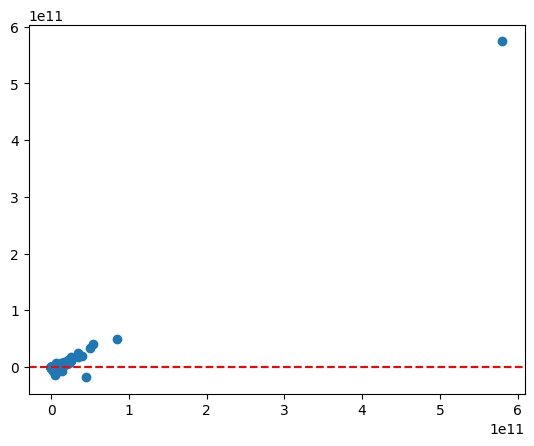

In [71]:
plt.scatter(y_test, y_test_residuals)
plt.axhline(y = 0, color = 'r', linestyle = '--')
plt.show()

Visualisasi ini menunjukkan plot residuals dari prediksi model terhadap harga properti. Residual adalah selisih antara nilai sebenarnya dan nilai yang diprediksi. Pada grafik ini, terdapat satu titik yang sangat jauh di luar pola sisa data, yang menunjukkan bahwa terdapat outlier yang signifikan, dengan kesalahan prediksi yang sangat besar. Sebagian besar titik lainnya terdistribusi cukup dekat dengan garis horizontal merah (yang mewakili residual nol), yang berarti model sebagian besar dapat memprediksi nilai mendekati harga sebenarnya. Namun, outlier yang jelas terlihat menunjukkan bahwa model mungkin mengalami kesulitan untuk memprediksi kasus ekstrem, yang bisa disebabkan oleh ketidaksesuaian dalam data atau kekurangan model dalam menangkap kompleksitas hubungan di data tersebut.

**Memilih Model Evaluation**
Saya memilih MAE dan R² Score dengan alasan:

MAE:

Mengukur kesalahan rata-rata prediksi dalam satuan harga yang langsung dapat dipahami.
Membantu memahami kesalahan secara praktis, tanpa terlalu dipengaruhi oleh outliers.

R² Score:

Mengukur seberapa baik model menjelaskan variabilitas dari target variabel.
Memberikan gambaran umum tentang kualitas model dan efektivitas fitur yang digunakan.
Kombinasi antara MAE dan R² Score memberikan evaluasi komprehensif mengenai kesalahan prediksi dan kemampuan penjelasan model.

In [72]:
#Model Evaluation using MAE
print('Error - train set: ', mean_absolute_error(y_train_trimmed, y_pred_train))
print('Error - Test Set: ', mean_absolute_error(y_test, y_pred_test))

Error - train set:  502456168.46032673
Error - Test Set:  2442880771.2502975


Dari hasil MAE yang diperoleh, terdapat perbedaan besar antara kesalahan di data training (sekitar 502 juta) dan test set (sekitar 2,44 miliar). Ini menunjukkan bahwa model memiliki performa yang jauh lebih baik pada data yang digunakan untuk melatihnya dibandingkan pada data yang belum pernah dilihat sebelumnya. Hal ini mengindikasikan adanya overfitting, di mana model terlalu sesuai dengan pola pada data training namun tidak mampu melakukan generalisasi yang baik pada data baru. Model perlu disederhanakan atau disesuaikan untuk meningkatkan kemampuannya dalam generalisasi.

In [73]:
# Diatas 70%??
print('R2 Score - Train Set : ', r2_score(y_train_trimmed, y_pred_train))
print('R2 Score - Test Set  : ', r2_score(y_test, y_pred_test))

R2 Score - Train Set :  0.7382379624030868
R2 Score - Test Set  :  0.05080815513357817


Dari nilai R² Score yang diperoleh, terlihat bahwa model memiliki performa yang sangat baik pada data training dengan nilai sekitar 0.738, yang berarti model mampu menjelaskan sekitar 73.8% variabilitas dalam data training. Namun, pada data test, nilai R² Score turun drastis menjadi sekitar 0.05, yang menunjukkan model hampir tidak mampu menjelaskan variabilitas dalam data test. Hal ini mengindikasikan adanya overfitting, di mana model terlalu menyesuaikan diri dengan data training sehingga tidak dapat menangani data baru dengan baik. Ini berarti model tidak mampu menangkap pola yang dapat digeneralisasi, dan memerlukan perbaikan untuk meningkatkan kinerjanya pada data yang tidak terlihat.

# **IX. Model Saving**

In [74]:
#Save the Files
with open('list_num_cols.txt', 'w') as file_1:
  json.dump(['bedrooms','land_area','building_area','floors','maid_bedrooms','maid_bathrooms','voltage','building_age'], file_1)

with open('list_cat_cols.txt', 'w') as file_2:
  json.dump(['city'], file_2)

with open('scaler.pkl', 'wb') as file_3:
  pickle.dump(scaler, file_3)

with open('encoder.pkl', 'wb') as file_4:
  pickle.dump(encoder, file_4)

with open('model_lin_reg.pkl', 'wb') as file_5:
  pickle.dump(model_lin_reg, file_5)

# **X. Kesimpulan**

**Kesimpulan EDA**

1. Persentase Rumah Berdasarkan Daya Listrik (Voltage)

Visualisasi Pie Chart menunjukkan bahwa 66.2% rumah berada di Golongan R-1 (450 VA - 2200 VA), yang mengindikasikan bahwa mayoritas rumah menggunakan daya listrik rendah hingga sedang, menunjukkan rumah-rumah yang sederhana. Sebanyak 25.9% rumah masuk dalam Golongan R-2 (3300 VA - 5500 VA), dan hanya 7.9% rumah yang berada di Golongan R-3 (6600 VA ke atas), umumnya rumah besar atau mewah dengan kebutuhan listrik yang lebih tinggi.

2. Top 5 Area dengan Rumah Mewah Terbanyak dan Harga Rata-Rata

* Sentul City memiliki 66 rumah mewah dengan rata-rata harga 10,2 miliar.
* Pantai Indah Kapuk memiliki 33 rumah mewah dengan rata-rata harga 20,2 miliar.
* Kemang memiliki 23 rumah mewah dengan harga rata-rata 21,4 miliar.
* BSD memiliki 19 rumah mewah dengan harga rata-rata 14,2 miliar.
* Alam Sutera memiliki 14 rumah mewah dengan harga rata-rata 10,8 miliar.

Area seperti Kemang dan Pantai Indah Kapuk menunjukkan harga rata-rata yang lebih tinggi dibanding area lain, mengindikasikan nilai properti premium.

3. Rekomendasi Rumah untuk Keluarga Bapak Slamet

Dari uji t-test yang dilakukan untuk membandingkan harga rumah sebelum dan setelah tahun 2000:

Jumlah rumah sebelum tahun 2000 adalah 38 unit, dan setelah tahun 2000 ada 2813 unit.
Hasil t-test dengan p-value sebesar 0.999 mengindikasikan bahwa tidak ada perbedaan signifikan antara harga rumah yang dibangun sebelum dan setelah tahun 2000.
Dengan kata lain, usia rumah tidak menjadi penentu utama harga yang lebih murah, dan faktor lain seperti lokasi serta kondisi mungkin lebih mempengaruhi nilai properti.

Kesimpulan Akhir EDA

* Mayoritas rumah menggunakan daya listrik rendah (Golongan R-1), sedangkan rumah mewah dengan daya tinggi (Golongan R-3) hanya minoritas.
* Area seperti Kemang dan Pantai Indah Kapuk memiliki rumah mewah dengan harga rata-rata yang tinggi, mengindikasikan nilai premium di kawasan tersebut.
* Tidak ada bukti kuat bahwa rumah sebelum tahun 2000 lebih murah, sehingga tidak dapat direkomendasikan hanya berdasarkan usia saja.

**Kesimpulan Model**

Berdasarkan hasil yang telah saya peroleh, berikut adalah kesimpulan akhir dari model Linear Regression yang telah saya buat:
1. Kelebihan

Model Linear Regression yang digunakan memiliki beberapa kelebihan. Salah satunya adalah sifatnya yang sederhana dan mudah ditafsirkan, yang memungkinkan saya memahami secara langsung bagaimana setiap fitur mempengaruhi harga properti. Selain itu, model ini efisien secara komputasi dan sangat cocok untuk digunakan pada tahap eksplorasi awal, di mana saya perlu mendapatkan insight cepat dari data.

2. Kelemahan

Hasil MAE menunjukkan adanya perbedaan besar antara data training dan test set. Pada training set, MAE training mencapai sekitar 502 juta, sedangkan untuk test set mencapai 2,44 miliar. Perbedaan yang besar ini mengindikasikan bahwa model memiliki performa yang jauh lebih baik ketika memprediksi data yang dikenalnya, namun kesulitan dalam memprediksi data baru. Ini adalah tanda overfitting yang kuat.
Selain itu, R² Score pada training set sebesar 0.738 mengindikasikan bahwa model dapat menjelaskan sekitar 73.8% variabilitas dalam data tersebut, namun hanya mampu mencapai 0.05 pada data test set. Ini berarti model hampir tidak mampu menjelaskan variabilitas dalam data test, yang semakin memperkuat indikasi overfitting. Model terlalu cocok pada data pelatihan sehingga tidak mampu menangkap pola secara umum pada data baru.

2. Analisis Residual dan Normalitas

Dari Q-Q Plot dan analisis residual yang saya lakukan, terlihat bahwa residuals tidak terdistribusi dengan baik sesuai distribusi normal. Ada beberapa outliers signifikan yang sangat menyimpang, dan ini menunjukkan bahwa model masih kesulitan dalam menangani data dengan harga yang ekstrem. Meskipun begitu, nilai Durbin-Watson yang saya peroleh sekitar 2.005 menunjukkan bahwa tidak ada autokorelasi di antara residuals, yang berarti kesalahan prediksi bersifat independen dan ini adalah hasil yang positif.

3. Performa Model Secara Keseluruhan

Dari evaluasi yang dilakukan, Linear Regression memberikan hasil yang cukup baik di data training, namun gagal memberikan performa yang serupa di data test, sehingga terjadi overfitting. Model ini tampaknya tidak cukup fleksibel untuk menangkap pola yang lebih kompleks di dalam data, terutama untuk harga properti yang lebih tinggi atau lebih rendah dari rata-rata.

Rencana Perbaikan:

* Tangani Outliers: Saya perlu menangani outliers lebih baik dengan melakukan capping atau menghapus data yang terlalu ekstrem agar model bisa lebih stabil.
Model yang Lebih Fleksibel: Saya juga akan mencoba menggunakan model yang lebih kompleks dan mampu menangkap pola non-linear, seperti Random Forest, Gradient Boosting, atau XGBoost.
* Regularisasi: Menggunakan regularisasi seperti Ridge Regression atau Lasso Regression dapat membantu mengurangi overfitting dengan menekan fitur yang kurang relevan.
Validasi dengan Cross-Validation: Saya akan melakukan cross-validation untuk memeriksa kinerja model secara lebih menyeluruh dan memastikan model bisa bekerja lebih baik di berbagai subset data.

Kesimpulan

Model Linear Regression yang telah saya bangun saat ini cenderung overfitting dan tidak bisa menangkap pola general dari data baru. Saya berencana untuk melakukan beberapa perbaikan seperti menangani outliers, menggunakan model yang lebih kompleks, serta menerapkan regularisasi dan cross-validation. Dengan perbaikan ini, saya berharap model ini akan lebih mampu menghasilkan prediksi yang akurat dan dapat diandalkan.